# Visualizing Monetary Policy

In [1]:
# !pip install pandas-datareader

In [2]:
import os
import pandas as pd
import pandas_datareader.data as web
import datetime
import numpy as np
import matplotlib.pyplot as plt

start = datetime.datetime(1948, 1, 1)
end = datetime.datetime.today()
df = web.DataReader("GDPC1", "fred", start, end).resample("Q").mean()
df

GDPC1
DATE                 
1948-03-31   2087.442
1948-06-30   2121.899
1948-09-30   2134.056
1948-12-31   2136.440
1949-03-31   2107.001
...               ...
2021-12-31  20006.181
2022-03-31  19924.088
2022-06-30  19895.271
2022-09-30  20054.663
2022-12-31  20187.495

[300 rows x 1 columns]

<AxesSubplot:xlabel='DATE'>

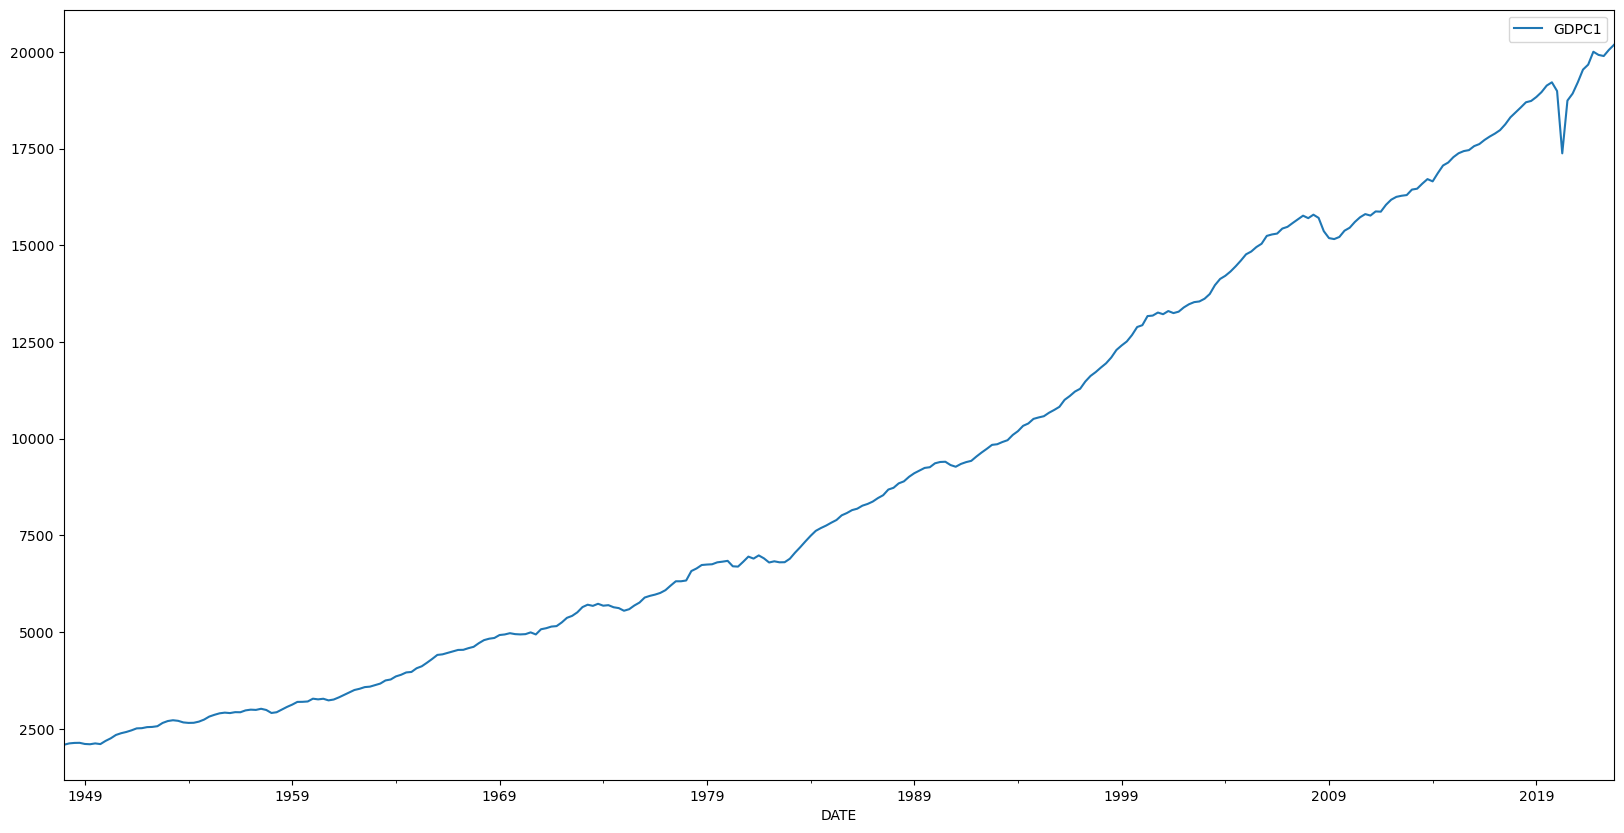

In [3]:
df.plot.line(figsize = (20,10))

In [4]:
def gather_data(data_codes,
               start,end = datetime.datetime.today(),
               freq = "M"):
    df_init = False
    for key, code in data_codes.items():
        if df_init == False:
            #.first() or .last() or .median()...
            df = web.DataReader(code, "fred", start, end).resample(freq).mean() 
            df.rename(columns = {code:key}, inplace = True)
            df_init = True
        else:
            df[key] = web.DataReader(code, "fred", start, end).resample(freq).mean()
            
    return df      

In [5]:
data_codes  = {"Base: Total": "BOGMBASEW",
               "Base: Currency in Circulation": "WCURCIR"}
start = datetime.datetime(2002, 1, 1)
end = datetime.datetime.today()
data = gather_data(data_codes = data_codes,
                  start = start,
                  end = end,
                  freq = "W")

In [6]:
data["Base: Currency in Circulation"] = data["Base: Currency in Circulation"].mul(1000)

In [7]:
data.iloc[-52:]

Base: Total  Base: Currency in Circulation
DATE                                                  
2019-09-22    3159026.0                      1762096.0
2019-09-29    3159026.0                      1761662.0
2019-10-06    3252373.0                      1762796.0
2019-10-13    3252373.0                      1766295.0
2019-10-20    3235853.0                      1770761.0
2019-10-27    3235853.0                      1771533.0
2019-11-03    3282965.0                      1776039.0
2019-11-10    3282965.0                      1782249.0
2019-11-17    3311715.0                      1786866.0
2019-11-24    3311715.0                      1785488.0
2019-12-01    3340473.0                      1787801.0
2019-12-08    3340473.0                      1793186.0
2019-12-15    3441827.0                      1791932.0
2019-12-22    3441827.0                      1792816.0
2019-12-29    3436379.0                      1799105.0
2020-01-05    3436379.0                      1805880.0
2020-01-12    3471534.0                      1804965.0
2020-01-19    3471534.0                      1797216.0
2020-01-26    3412446.0                      1794685.0
2020-02-02    3412446.0                      1792176.0
2020-02-09    3453764.0                      1792586.0
2020-02-16    3453764.0                      1794356.0
2020-02-23    3438801.0                      1798097.0
2020-03-01    3438801.0                      1798896.0
2020-03-08    3530453.0                      1803470.0
2020-03-15    3530453.0                      1814015.0
2020-03-22    3884720.0                      1827086.0
2020-03-29    3884720.0                      1859732.0
2020-04-05    4526124.0                      1876839.0
2020-04-12    4526124.0                      1880963.0
2020-04-19    4899202.0                      1884887.0
2020-04-26    4899202.0                      1890850.0
2020-05-03    5068799.0                      1903359.0
2020-05-10    5068799.0                      1916001.0
2020-05-17    5144614.0                      1925637.0
2020-05-24    5144614.0                      1933167.0
2020-05-31    5199813.0                      1944109.0
2020-06-07    5199813.0                      1949684.0
2020-06-14    5085807.0                      1953842.0
2020-06-21    5085807.0                      1956796.0
2020-06-28    4866046.0                      1961158.0
2020-07-05    4866046.0                      1967076.0
2020-07-12    4772522.0                      1974690.0
2020-07-19    4772522.0                      1978510.0
2020-07-26    4609143.0                      1982873.0
2020-08-02    4609143.0                      1988190.0
2020-08-09    4750981.0                      1996626.0
2020-08-16    4750981.0                      2003019.0
2020-08-23    4830999.0                      2007458.0
2020-08-30    4830999.0                      2010991.0
2020-09-06    4876690.0                      2016895.0
2020-09-13    4876690.0                      2026998.0

<AxesSubplot:xlabel='DATE'>

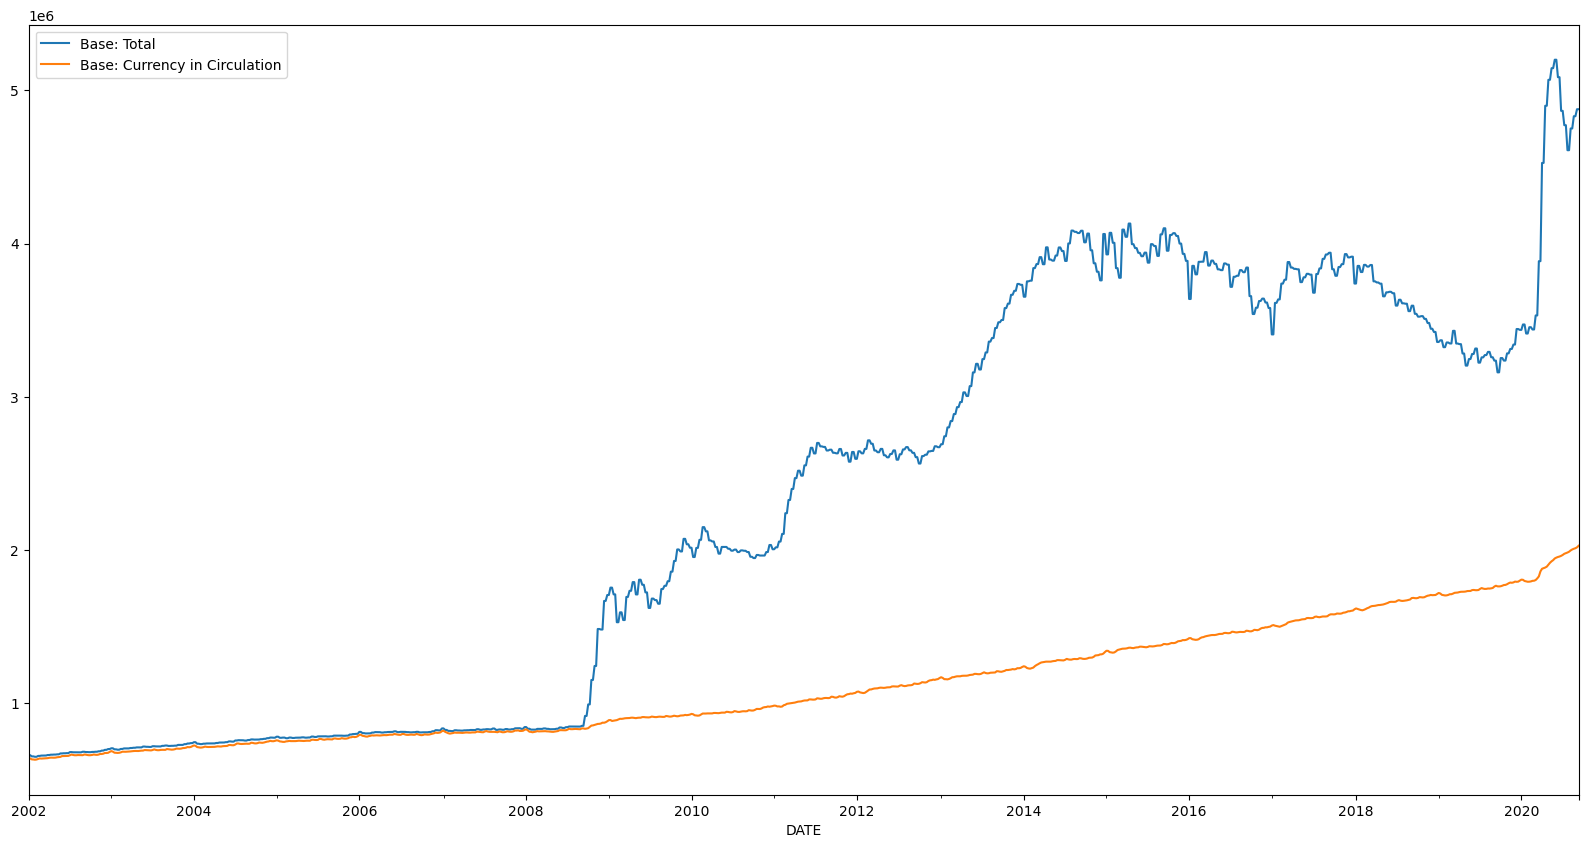

In [8]:
fig, ax = plt.subplots(figsize = (20,10))
data.plot.line(ax = ax)

Text(0.5, 1.0, 'Currency in Circulation')

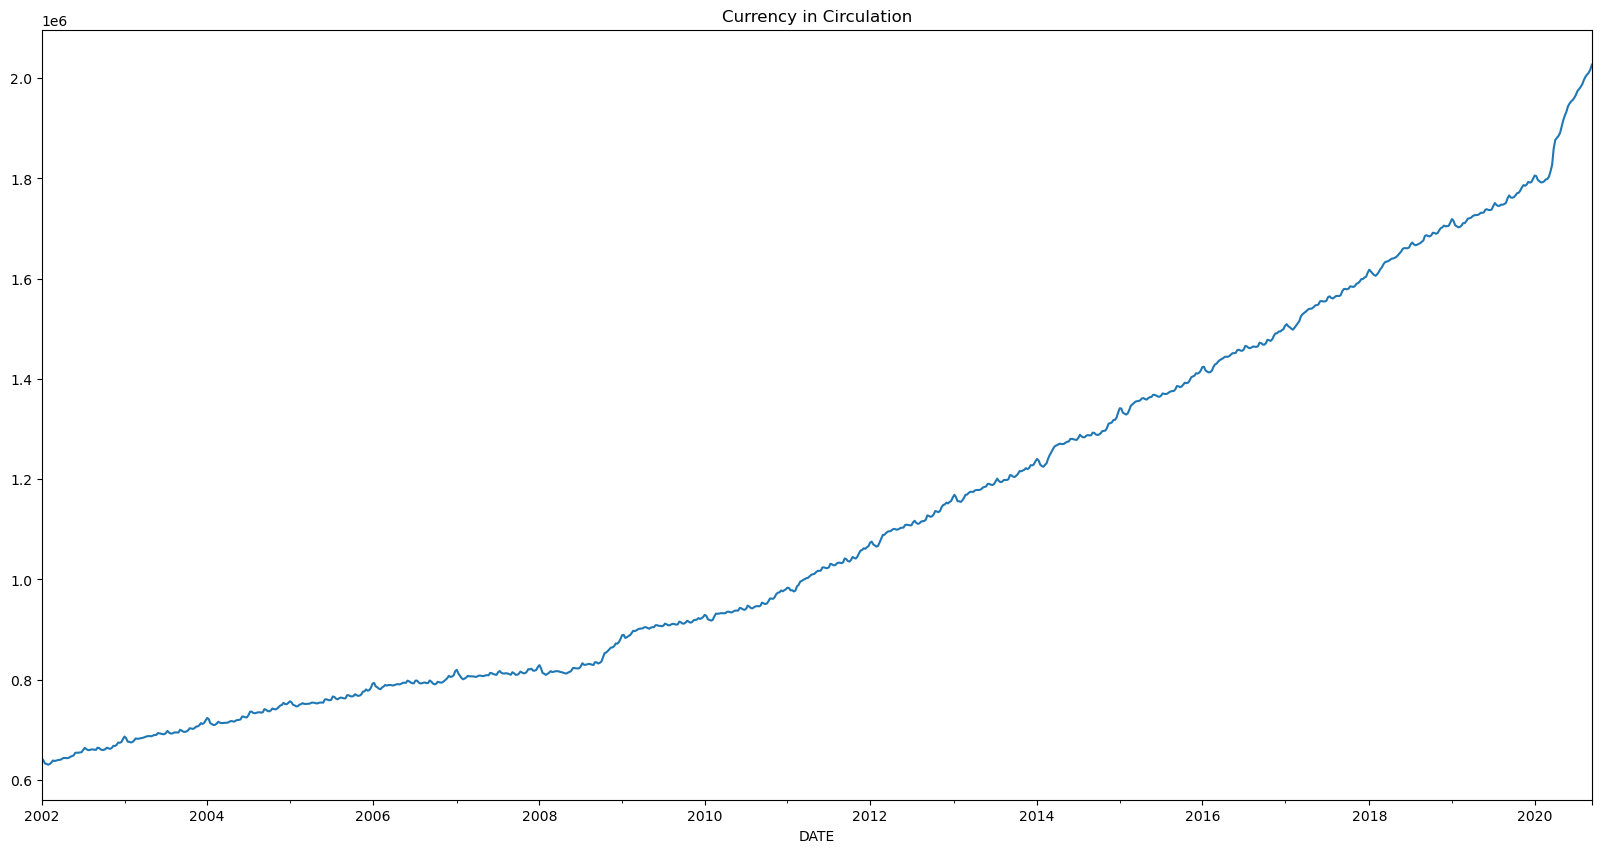

In [9]:
fig, ax = plt.subplots(figsize = (20,10))
data["Base: Currency in Circulation"].plot.line(ax = ax)
ax.set_title("Currency in Circulation")

In [10]:
data_codes  = {"Base: Total ($ Mil)": "BOGMBASE",
               "Base: Currency in Circulation ($ Mil)": "WCURCIR",
               # Assets
               "Balance Sheet: Total Assets ($ Mil)": "WALCL",
               "Balance Sheet Securities, Prem-Disc, Repos, and Loans ($ Mil)": "WSRLL",
               "Balance Sheet: Securities Held Outright ($ Mil)": "WSHOSHO",
               ### breakdown of securities holdings ###
               "Balance Sheet: U.S. Treasuries Held Outright ($ Mil)":"WSHOTSL",
               "Balance Sheet: Federal Agency Debt Securities ($ Mil)" : "WSHOFADSL",
               "Balance Sheet: Mortgage-Backed Securities ($ Mil)": "WSHOMCB",
               # other forms of lending
               "Balance Sheet: Repos ($ Mil)": "WORAL",
               "Balance Sheet: Central Bank Liquidity Swaps ($ Mil)" : "SWPT",
               "Balance Sheet: Direct Lending ($ Mil)" : "WLCFLL",
               # unamortized value of securities held (due to changes in interest rates)
               "Balance Sheet: Unamortized Security Premiums ($ Mil)": "WUPSHO",
               # Liabilities
               "Balance Sheet: Total Liabilities ($ Mil)" : "WLTLECL",
               "Balance Sheet: Federal Reserve Notes Outstanding ($ Mil)" : "WLFN",
               "Balance Sheet: Reverse Repos ($ Mil)": "WLRRAL",
               ### Major share of deposits 
               "Balance Sheet: Excess Reserves ($ Mil)": "EXCSRESNW",
               "Balance Sheet: Required Reserves ($ Mil)": "RESBALREQW",
               "Balance Sheet: Total Reserves ($ Mil)": "WRESBAL",
               "Balance Sheet: Deposits from Dep. Institutions ($ Mil)":"WLODLL",
               "Balance Sheet: U.S. Treasury General Account ($ Mil)": "WDTGAL",
               "Balance Sheet: Other Deposits ($ Mil)": "WOTHLB",
               "Balance Sheet: All Deposits ($ Mil)": "WLDLCL",
               # Interest Rates
               "Federal Funds Target (Pre-Crisis)": "DFEDTAR",
               "Federal Funds (Upper) Target":"DFEDTARU",
               "Effective Federal Funds Rate":"DFF",
               "Interest on Excess Reserves":"IOER",
               "Interest on Reserve Balances":"IORB",

               # Req Reserves and Vault Cash
               "Vault Cash ($ Mil)": "TLVAULTW",
               "Vault Cash Used as Req. ($ Mil)": "VAULT",
               }
data = gather_data(data_codes = data_codes,
                  start = start,
                  end = end,
                  freq = "M")


In [11]:
# save data as csv
data.to_csv("MonetaryData.csv")

## Merge two data sets, interst on reserves at Fed, with one overlapping date

In [12]:
plot_data = data[["Interest on Reserve Balances", "Interest on Excess Reserves"]]
match = plot_data[plot_data["Interest on Reserve Balances"] == plot_data["Interest on Excess Reserves"]]
match_date = match.index
match_val = match.sum() / 2
plot_data = plot_data.fillna(0)
plot_data = plot_data.sum(axis = 1)
plot_data.loc[match_date] = 0.15

<AxesSubplot:xlabel='DATE'>

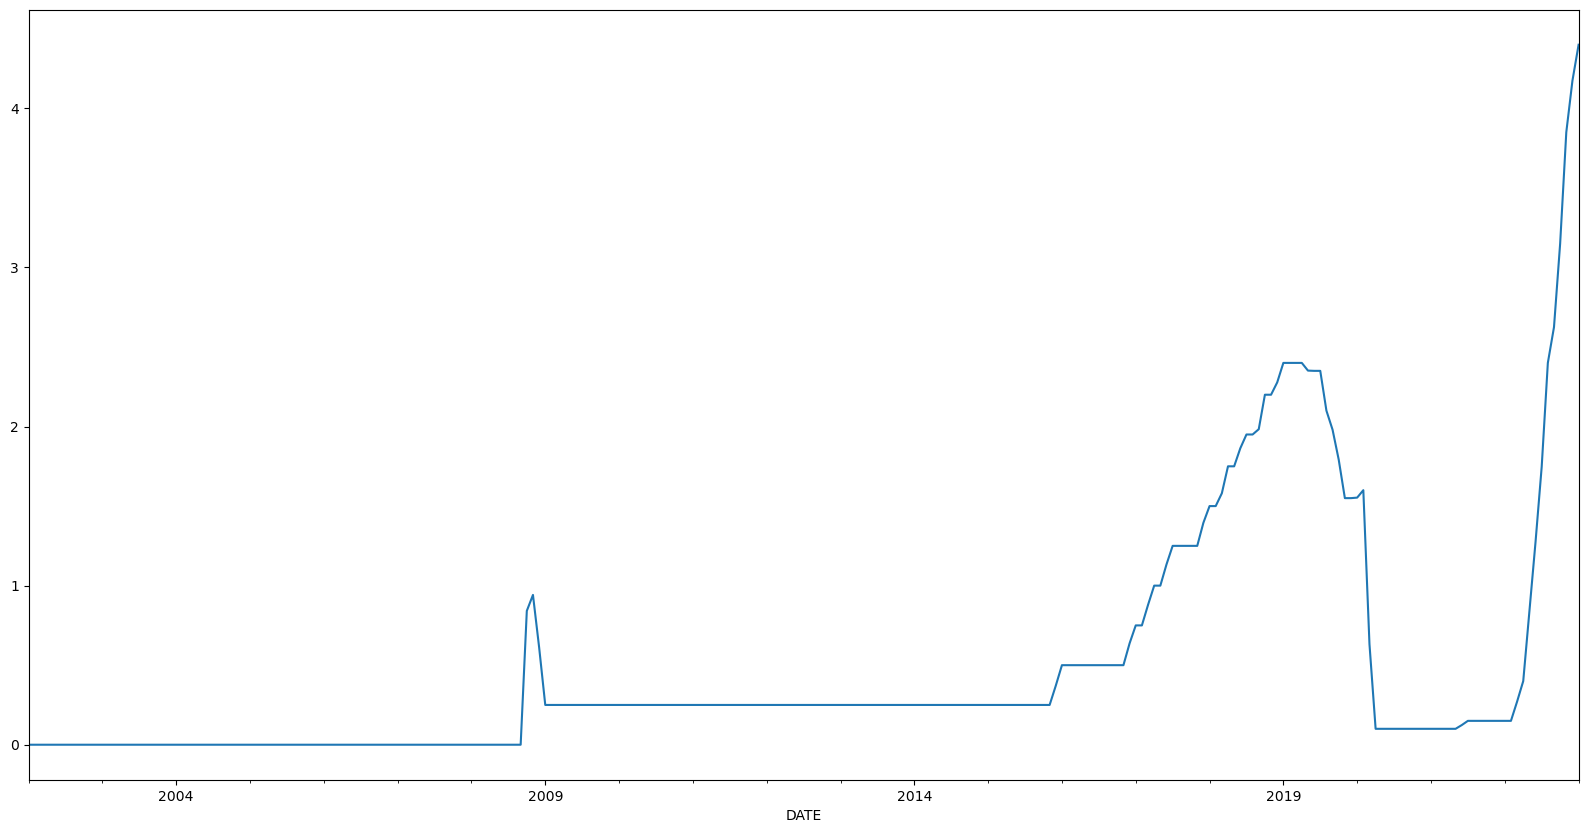

In [13]:
fig, ax = plt.subplots(figsize = (20,10))

plot_data.plot.line(ax = ax)

In [14]:
plot_data

DATE
2002-01-31    0.000000
2002-02-28    0.000000
2002-03-31    0.000000
2002-04-30    0.000000
2002-05-31    0.000000
                ...   
2022-09-30    2.625000
2022-10-31    3.150000
2022-11-30    3.850000
2022-12-31    4.174194
2023-01-31    4.400000
Freq: M, Length: 253, dtype: float64

<AxesSubplot:xlabel='DATE'>

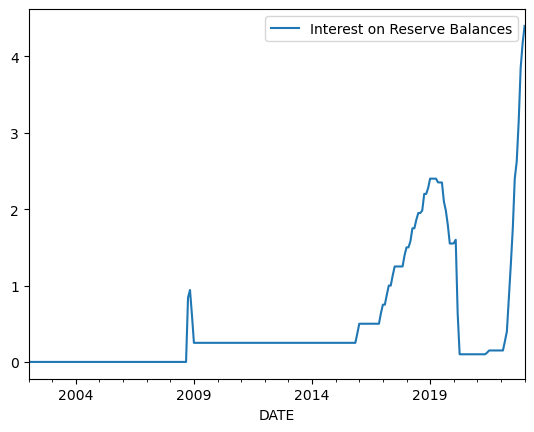

In [15]:
data["Interest on Reserve Balances"] = plot_data
data[["Interest on Reserve Balances"]].plot()

## Build function to plot lines of data in dataframe

C:\Users\jacob\AppData\Local\Temp\ipykernel_23156\967659058.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(y,2) for y in y_vals])
C:\Users\jacob\AppData\Local\Temp\ipykernel_23156\967659058.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(y) + "%" for y in ax.get_yticks()])


[Text(0, -1.0, '-1.0%'),
 Text(0, 0.0, '0.0%'),
 Text(0, 1.0, '1.0%'),
 Text(0, 2.0, '2.0%'),
 Text(0, 3.0, '3.0%'),
 Text(0, 4.0, '4.0%'),
 Text(0, 5.0, '5.0%'),
 Text(0, 6.0, '6.0%')]

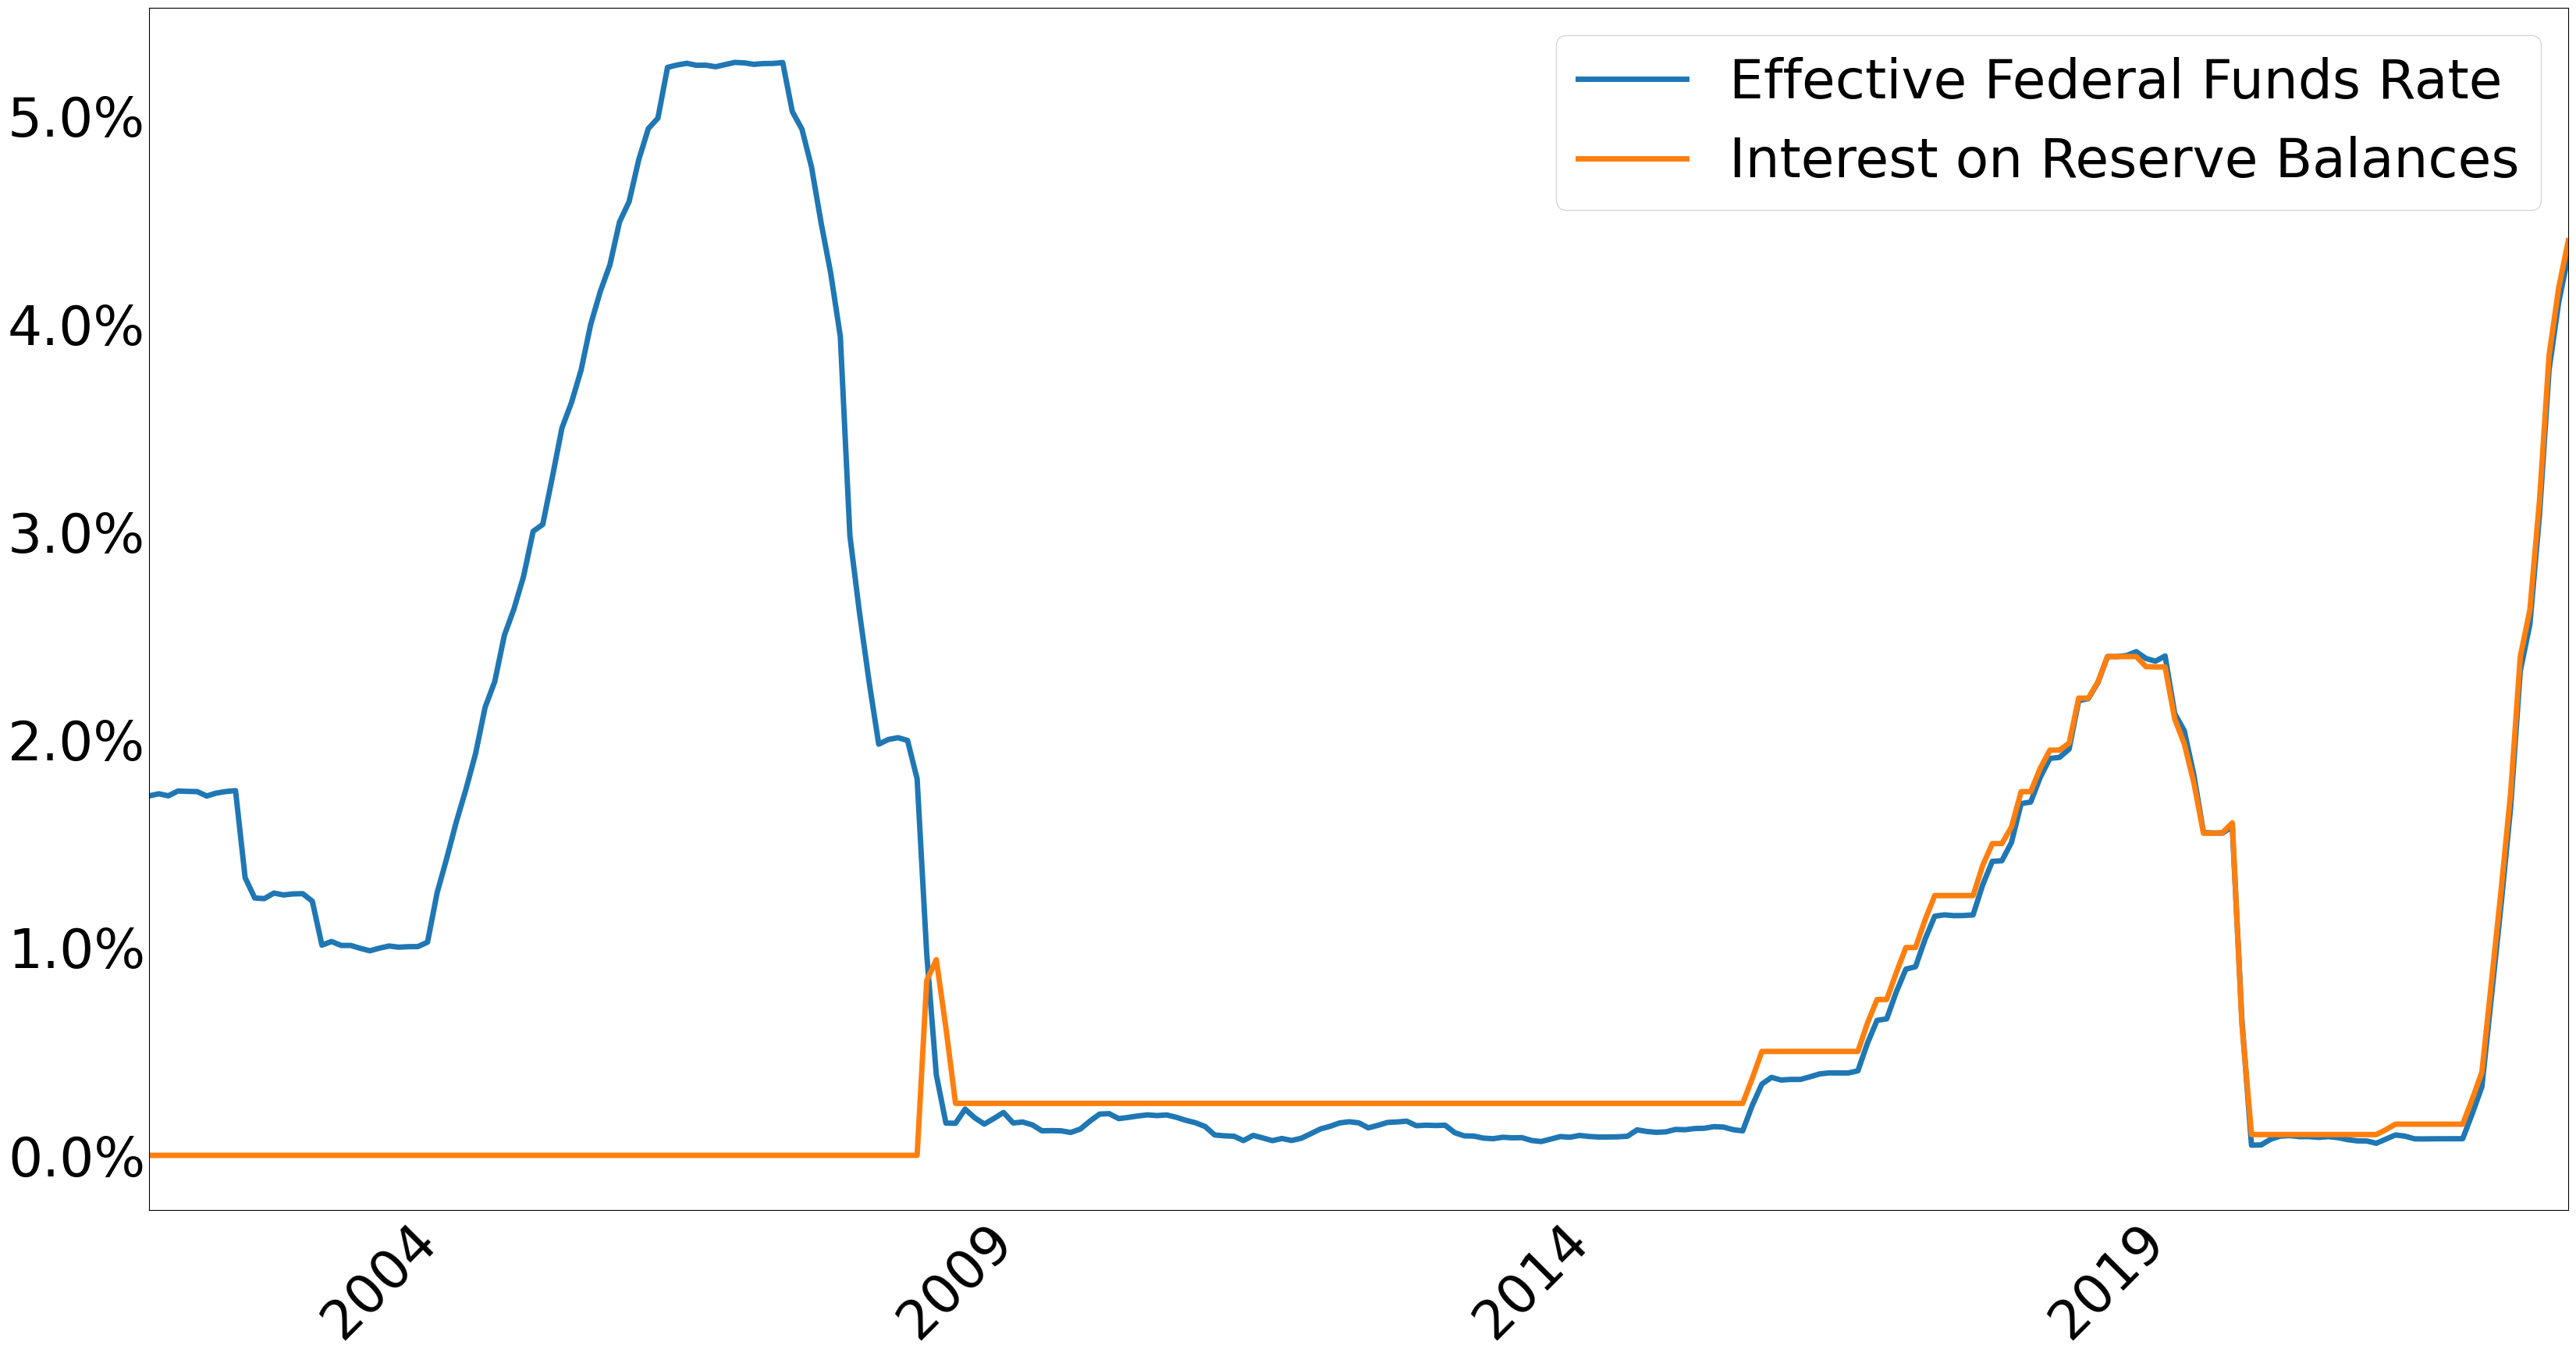

In [16]:
import os
def plot_lines(df,
              linewidth = 5,
              figsize = (40, 20),
              secondary_y = None,
              legend = True,
              pp = None,
              save_fig = False,
              global_fontsize = 50):
    plt.rcParams.update({"font.size": global_fontsize})
    fig, ax = plt.subplots(figsize = figsize)
    df.dropna(axis = 0, how = "all").plot.line(
        linewidth = linewidth,
        ax = ax,
        secondary_y = secondary_y,
        legend = legend)
    # remove label "DATE" on x-axis
    ax.set_xlabel("")
    ax.tick_params(axis = "x", rotation = 45)
    ax.tick_params(length = 0, which = "both")
    # round axis tick values
    # 1. access values
    y_vals = ax.get_yticks()
    ax.set_yticklabels([round(y,2) for y in y_vals])
    
    # save figure as file
    remove_chars = "[]:$'\\'"
    filename = str(list(df.keys()))
    # remove characters from filename
    for char in remove_chars:
        filename = filename.replace(char, "")
    if save_fig:
        folder = "Monetary Plots"
        try:
            os.mkdir(folder)
        except:
            pass
        plt.savefig(folder + "/" + filename[:50] + " line.png",
                   bbox_inches = "tight")
    
    return fig, ax

plot_data = data[["Effective Federal Funds Rate",
                          "Interest on Reserve Balances"]]
fig, ax = plot_lines(plot_data, save_fig = True)
ax.set_yticklabels([str(y) + "%" for y in ax.get_yticks()])

## Monetary Base

In [17]:
bil_to_mil_list  = ["Balance Sheet: Total Reserves ($ Mil)",
                    "Balance Sheet: Other Deposits ($ Mil)",
                    "Base: Currency in Circulation ($ Mil)"]
for key in bil_to_mil_list:
    data[key] = data[key].mul(1000)

In [18]:
money_vars = ["Base: Total ($ Mil)",
              "Base: Currency in Circulation ($ Mil)",
              "Balance Sheet: Excess Reserves ($ Mil)"]
plot_data = data[money_vars]
plot_data


Base: Total ($ Mil)  Base: Currency in Circulation ($ Mil)  \
DATE                                                                     
2002-01-31             653800.0                              635429.00   
2002-02-28             654600.0                              635884.00   
2002-03-31             659000.0                              639697.50   
2002-04-30             663400.0                              643579.50   
2002-05-31             668600.0                              648293.20   
...                         ...                                    ...   
2022-09-30            5410900.0                             2279946.25   
2022-10-31            5339600.0                             2283799.00   
2022-11-30            5418700.0                             2291416.00   
2022-12-31            5405400.0                             2297343.50   
2023-01-31            5328400.0                             2299897.25   

            Balance Sheet: Excess Reserves ($ Mil)  
DATE                                                
2002-01-31                                 1446.20  
2002-02-28                                 1377.25  
2002-03-31                                 1370.25  
2002-04-30                                 1263.50  
2002-05-31                                 1256.20  
...                                            ...  
2022-09-30                                     NaN  
2022-10-31                                     NaN  
2022-11-30                                     NaN  
2022-12-31                                     NaN  
2023-01-31                                     NaN  

[253 rows x 3 columns]

C:\Users\jacob\AppData\Local\Temp\ipykernel_23156\967659058.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(y,2) for y in y_vals])


(<Figure size 4000x2000 with 1 Axes>, <AxesSubplot:>)

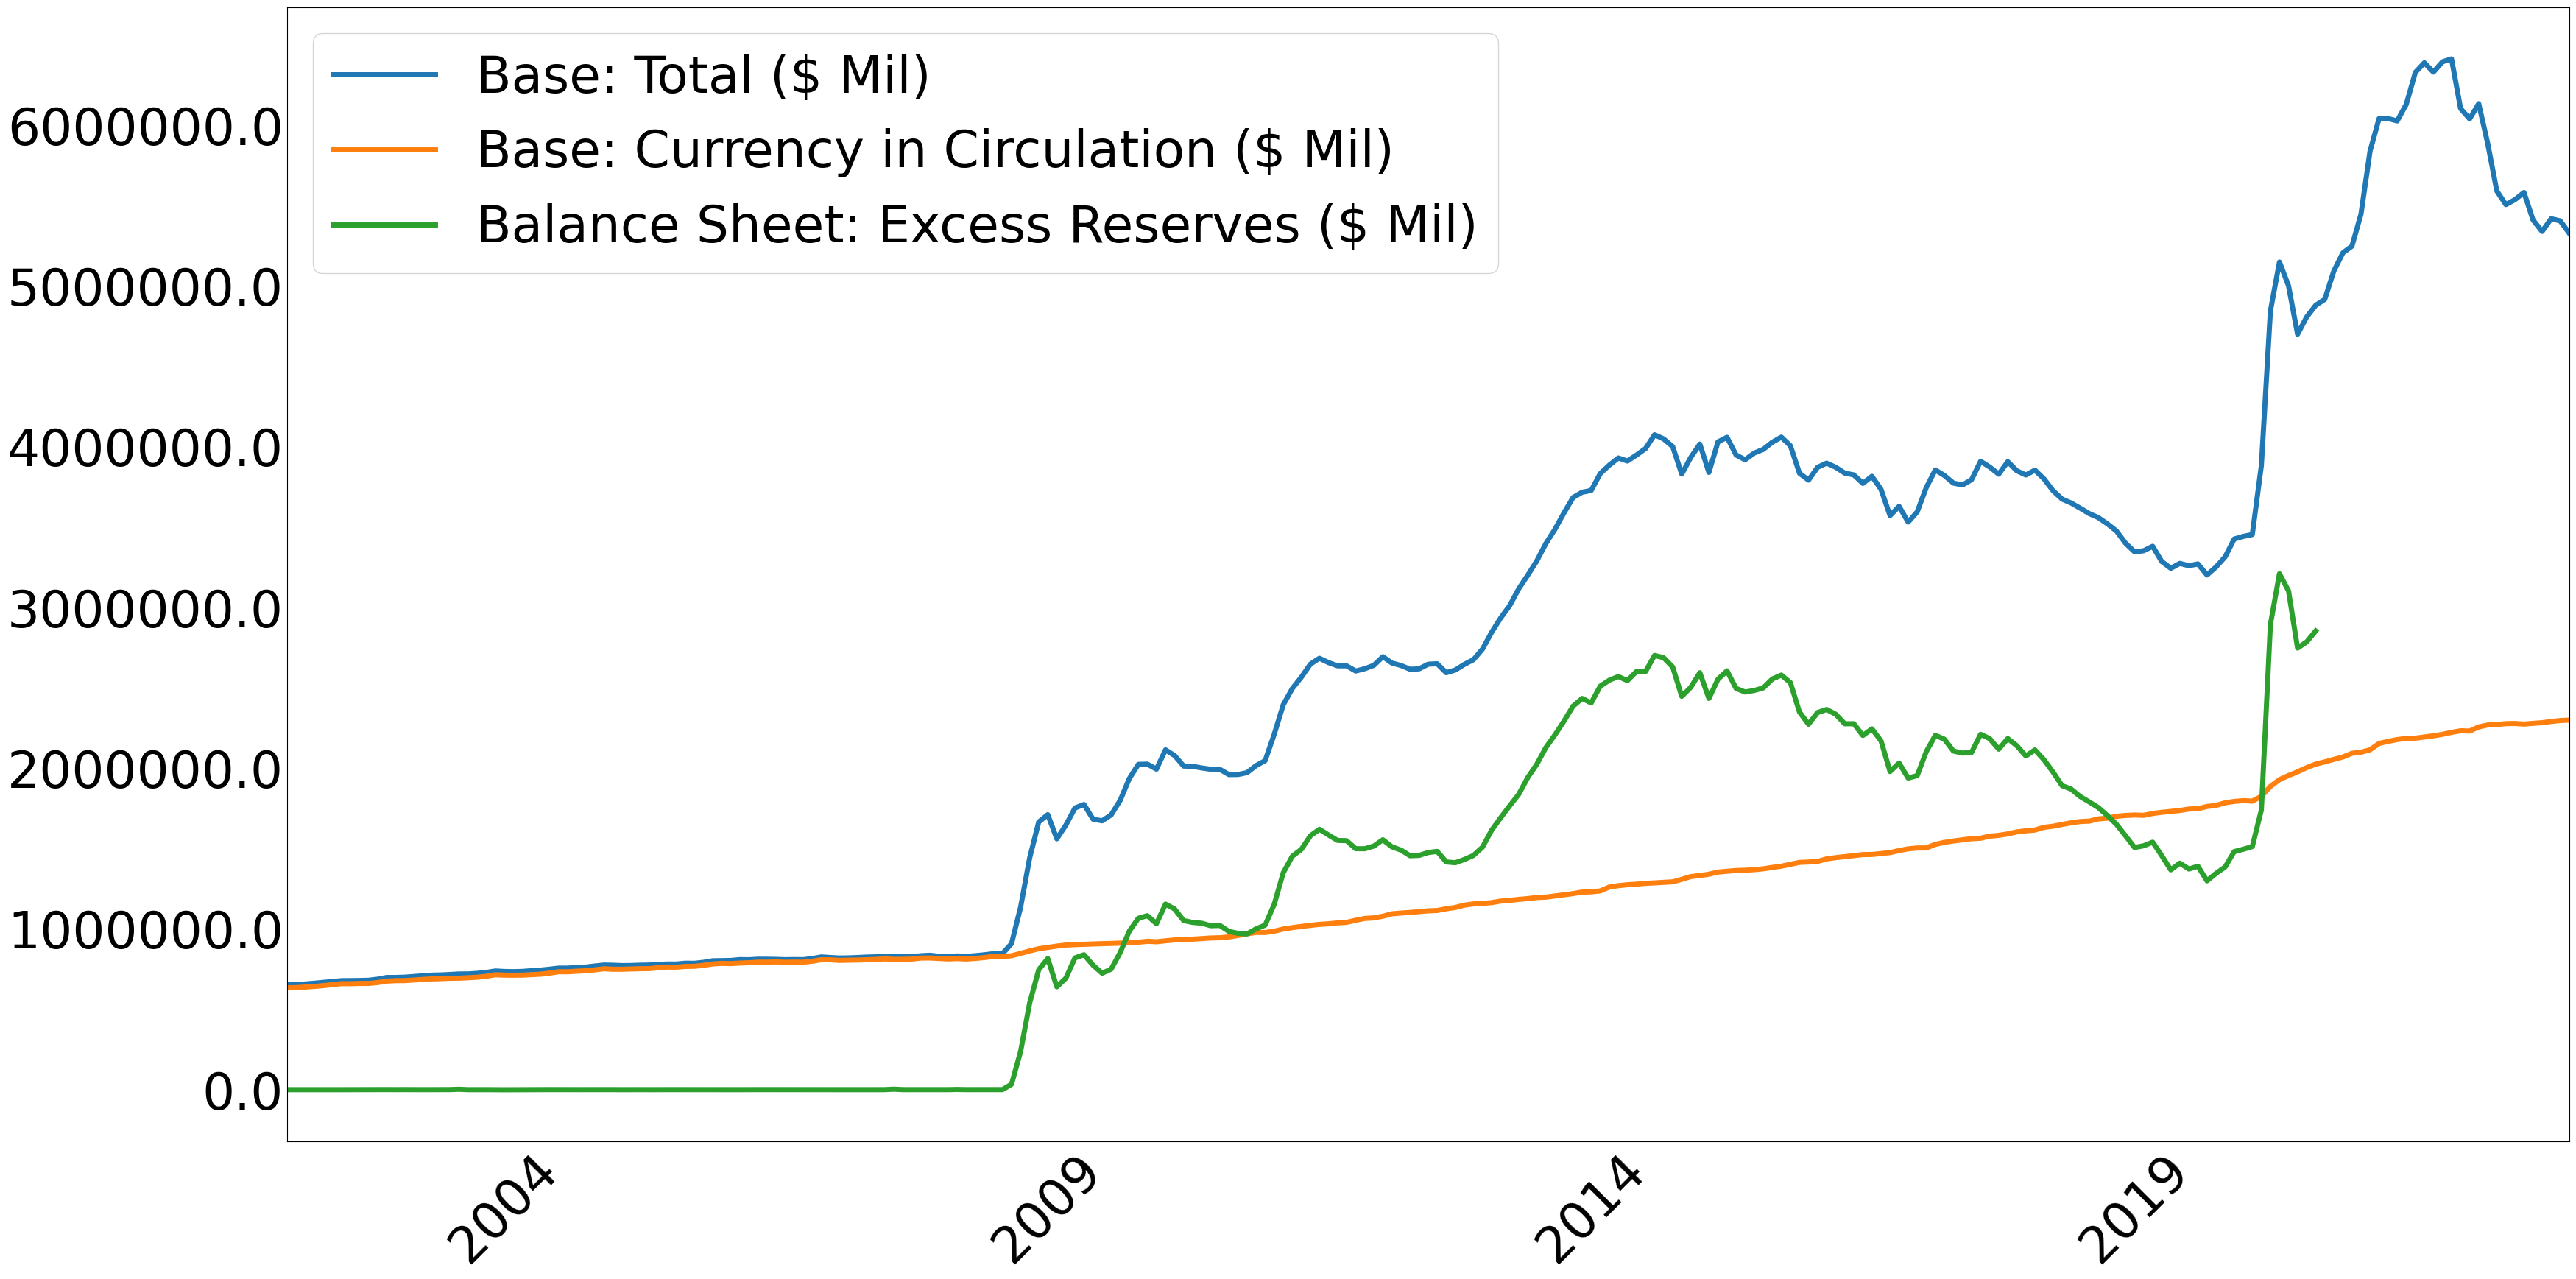

In [19]:
plot_lines(df = plot_data,
           linewidth = 5,
           figsize = (40, 20),
           pp = None)

## Stacked Lines

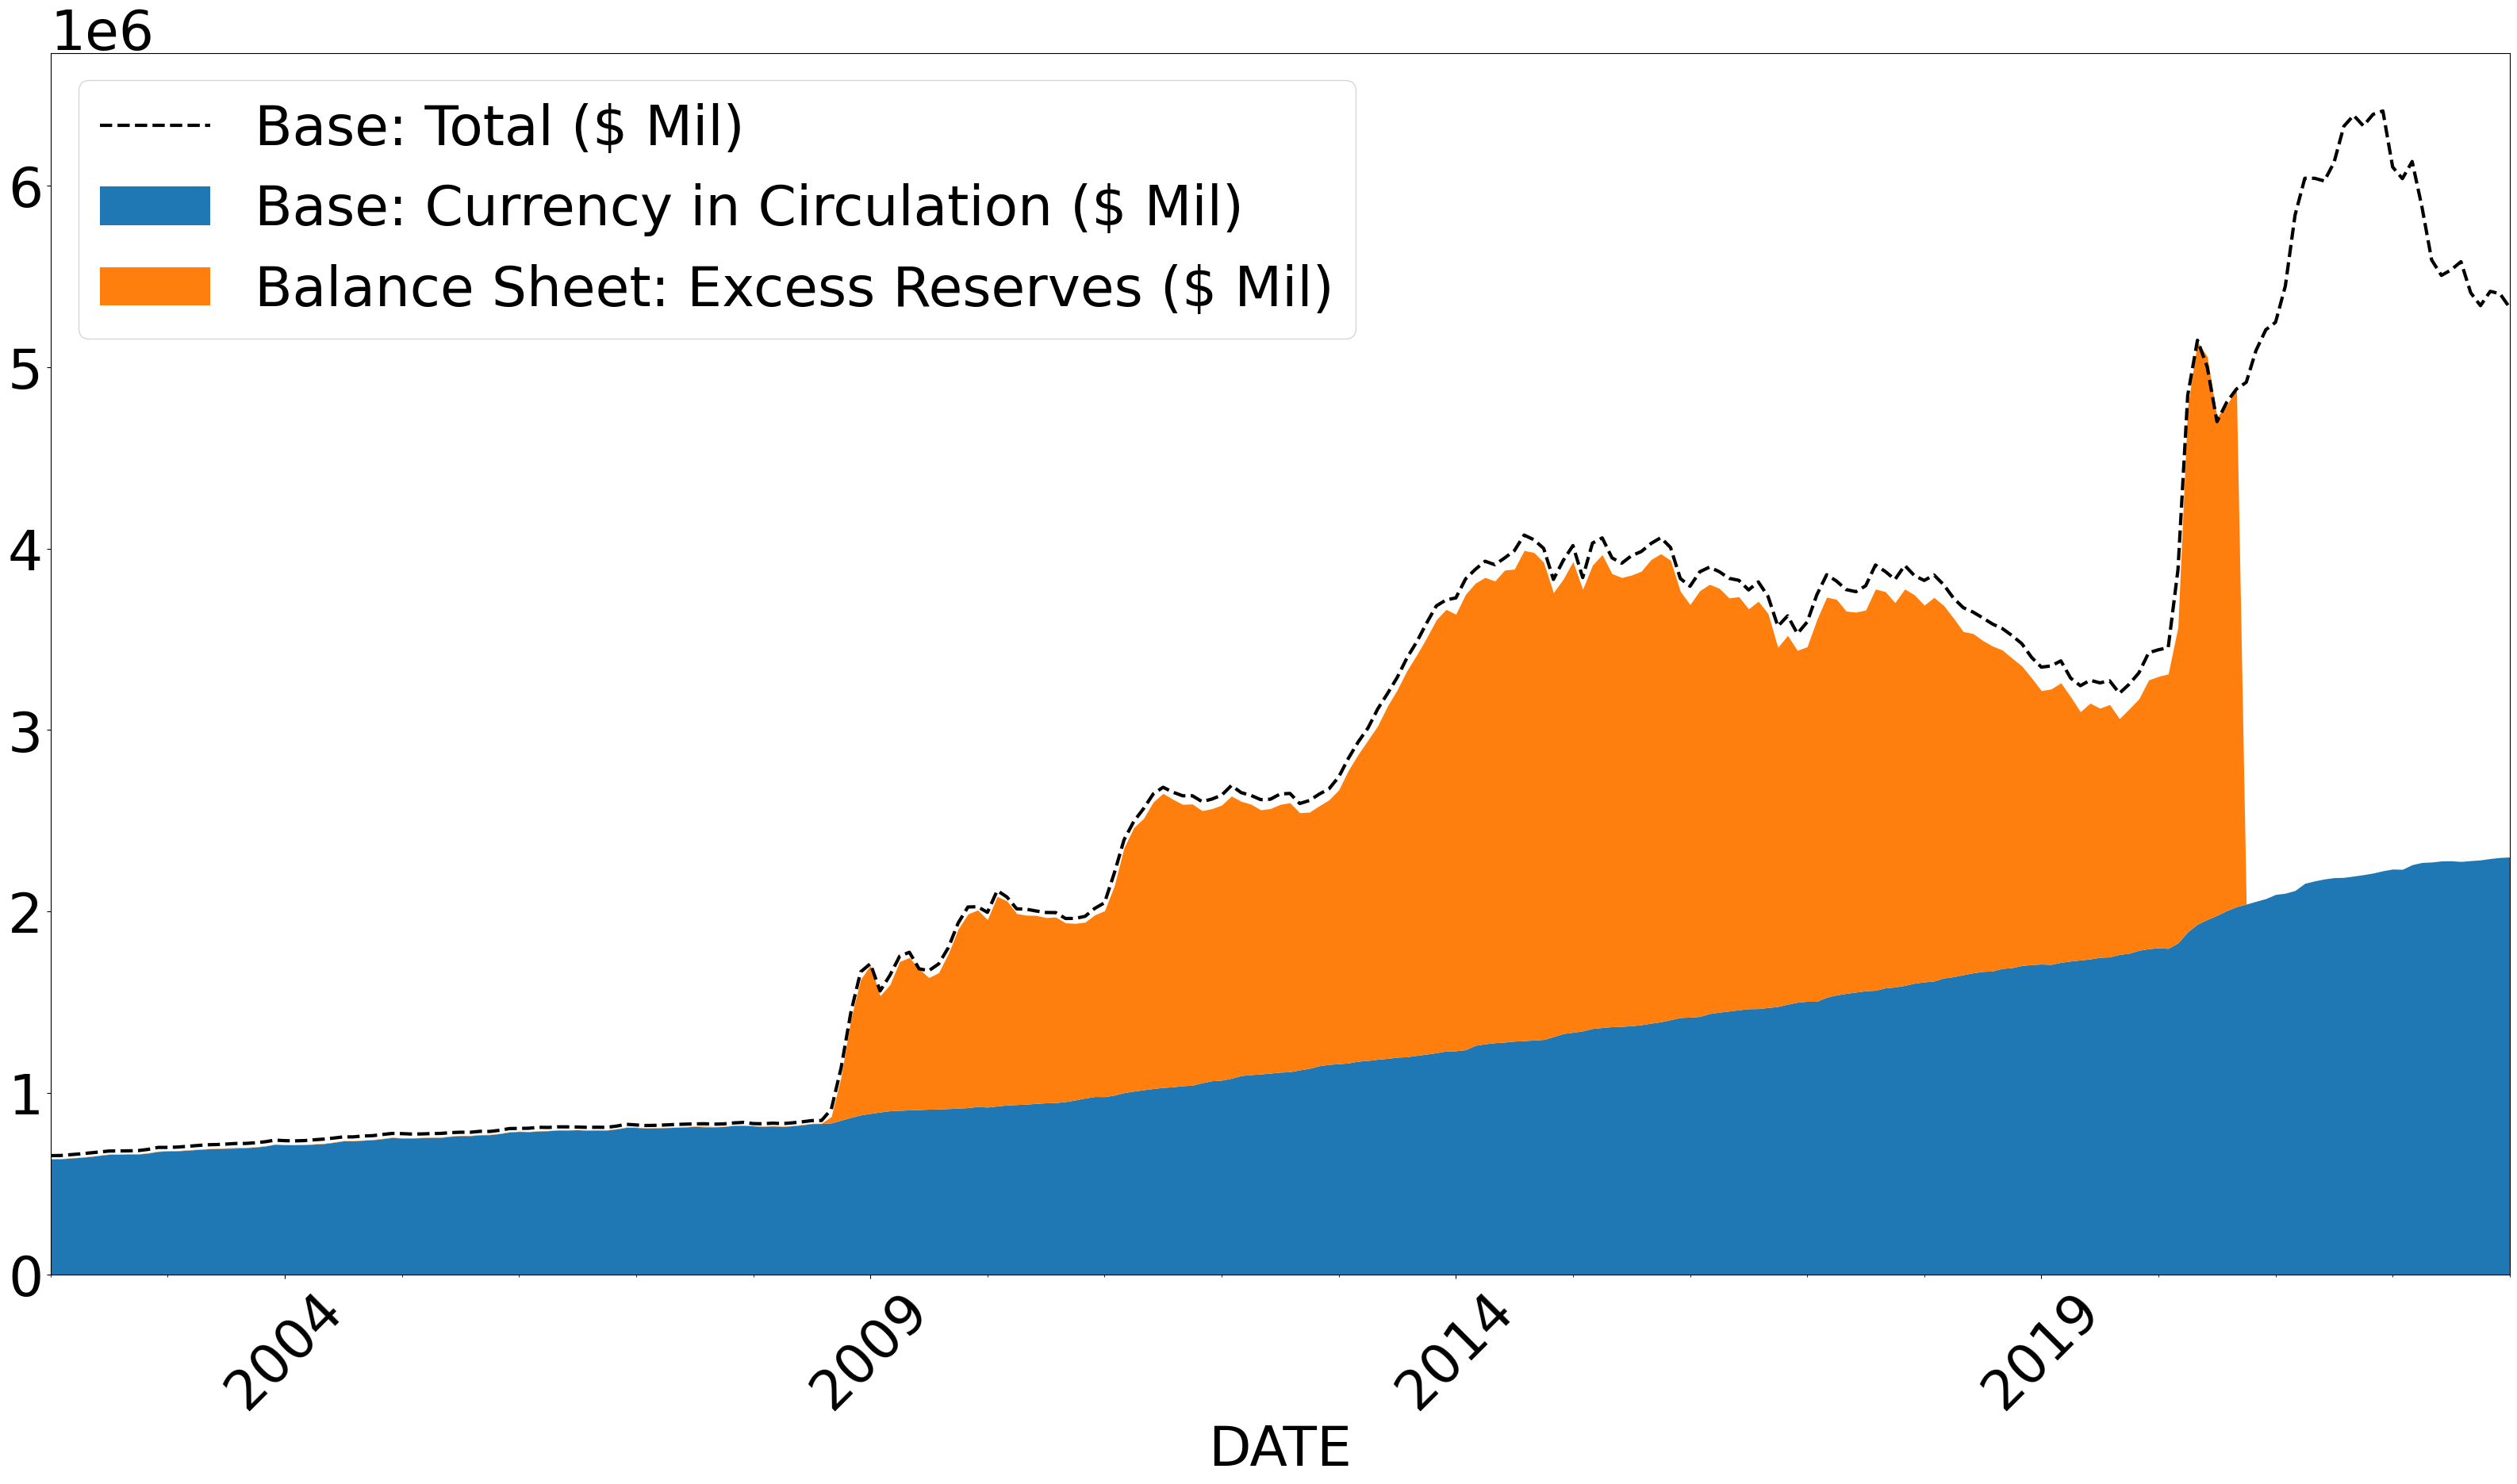

In [20]:
def plot_stacked(df,
                stack_vars,
                linewidth = 3,
                figsize = (40,20),
                total_var = False,
                global_fontsize = 50,
                ncol = 1):
    plt.rcParams.update({"font.size": global_fontsize})
    fig, ax = plt.subplots(figsize = figsize)
    
    if total_var != False:
        df[total_var].plot.line(linewidth = linewidth,
                               ax = ax,
                               c = "k",
                               label = total_var,
                               ls = "--")
    
    area_df = df[stack_vars]
    area_df.plot.area(stacked = True,
                   linewidth = 0,
                   ax = ax)
    ax.legend(loc = 2, ncol = ncol)
    plt.xticks(rotation = 45)
                # bbox_to_anchor = (0,1) places the legend outside of the 
                # graph area
    
    return fig, ax

stack_vars = money_vars[1:]
total_var = money_vars[0]
fig, ax = plot_stacked(df = data,
                       stack_vars = stack_vars,
                       total_var = total_var)

In [21]:
#stack_vars.append()
money_vars = money_vars + ["Balance Sheet: Required Reserves ($ Mil)"]
money_vars

['Base: Total ($ Mil)',
 'Base: Currency in Circulation ($ Mil)',
 'Balance Sheet: Excess Reserves ($ Mil)',
 'Balance Sheet: Required Reserves ($ Mil)']

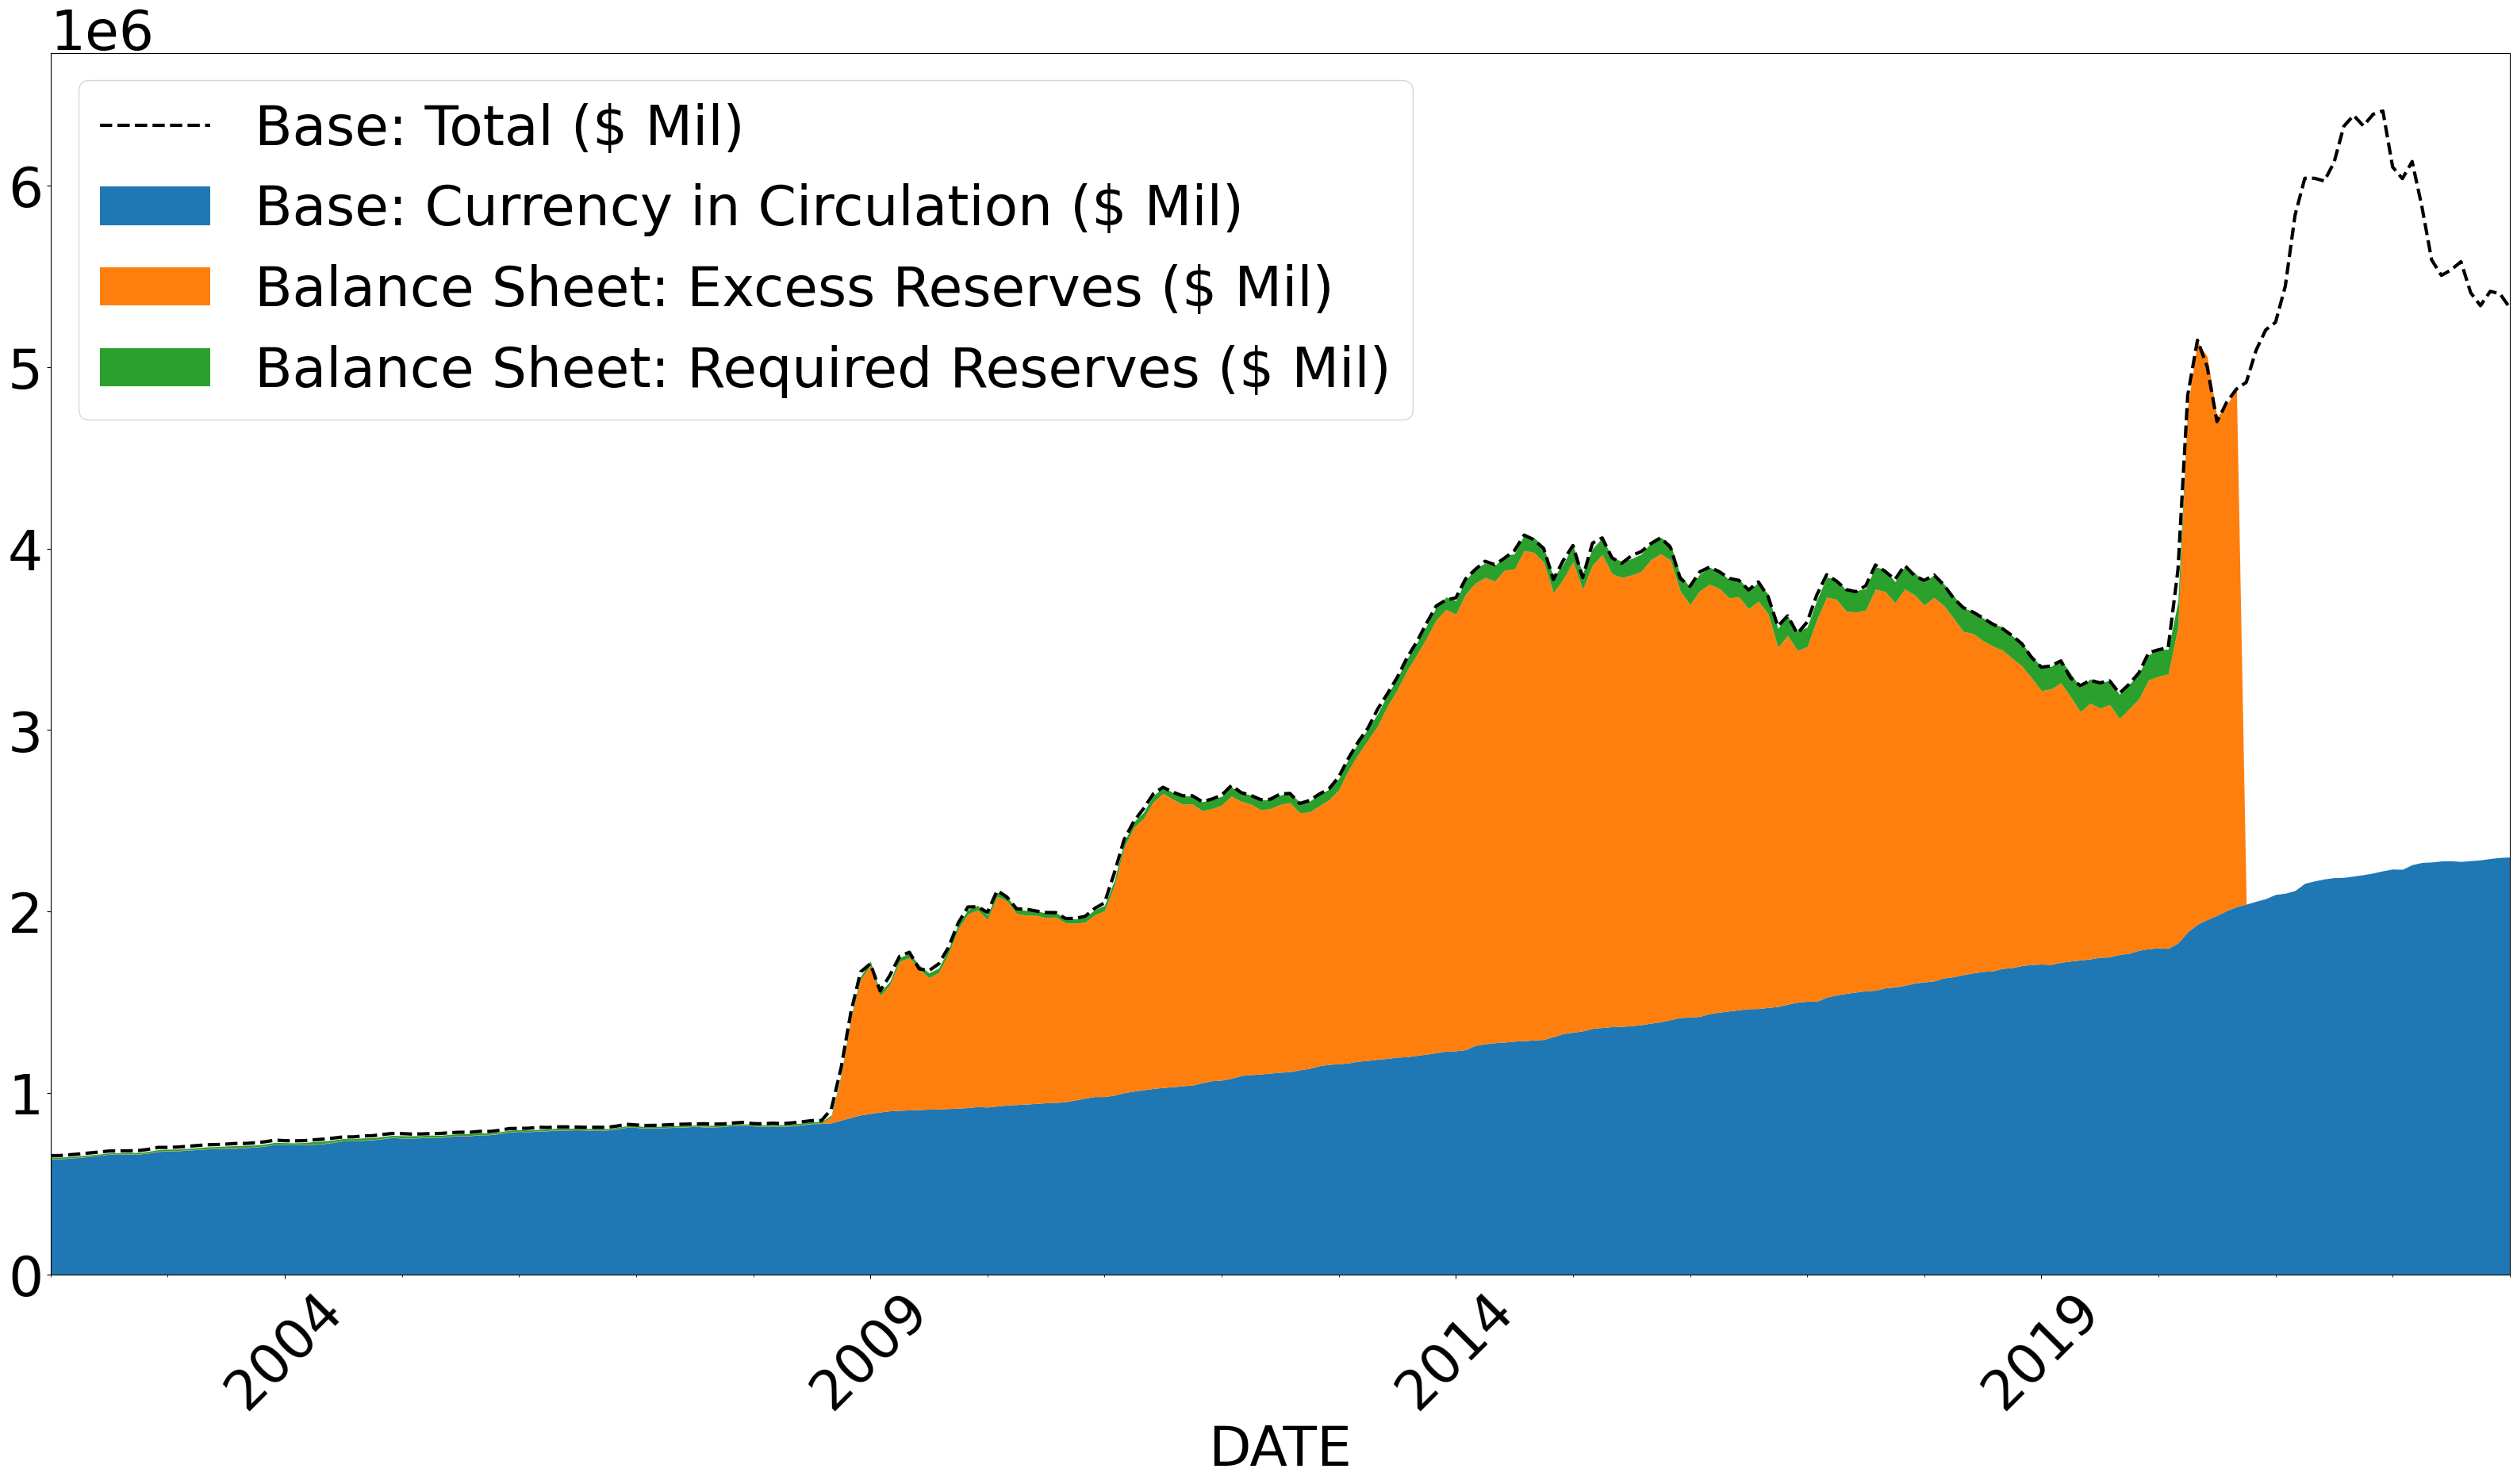

In [22]:
stack_vars = money_vars[1:]

fig, ax = plot_stacked(df = data,
                       stack_vars = stack_vars,
                       total_var = total_var)

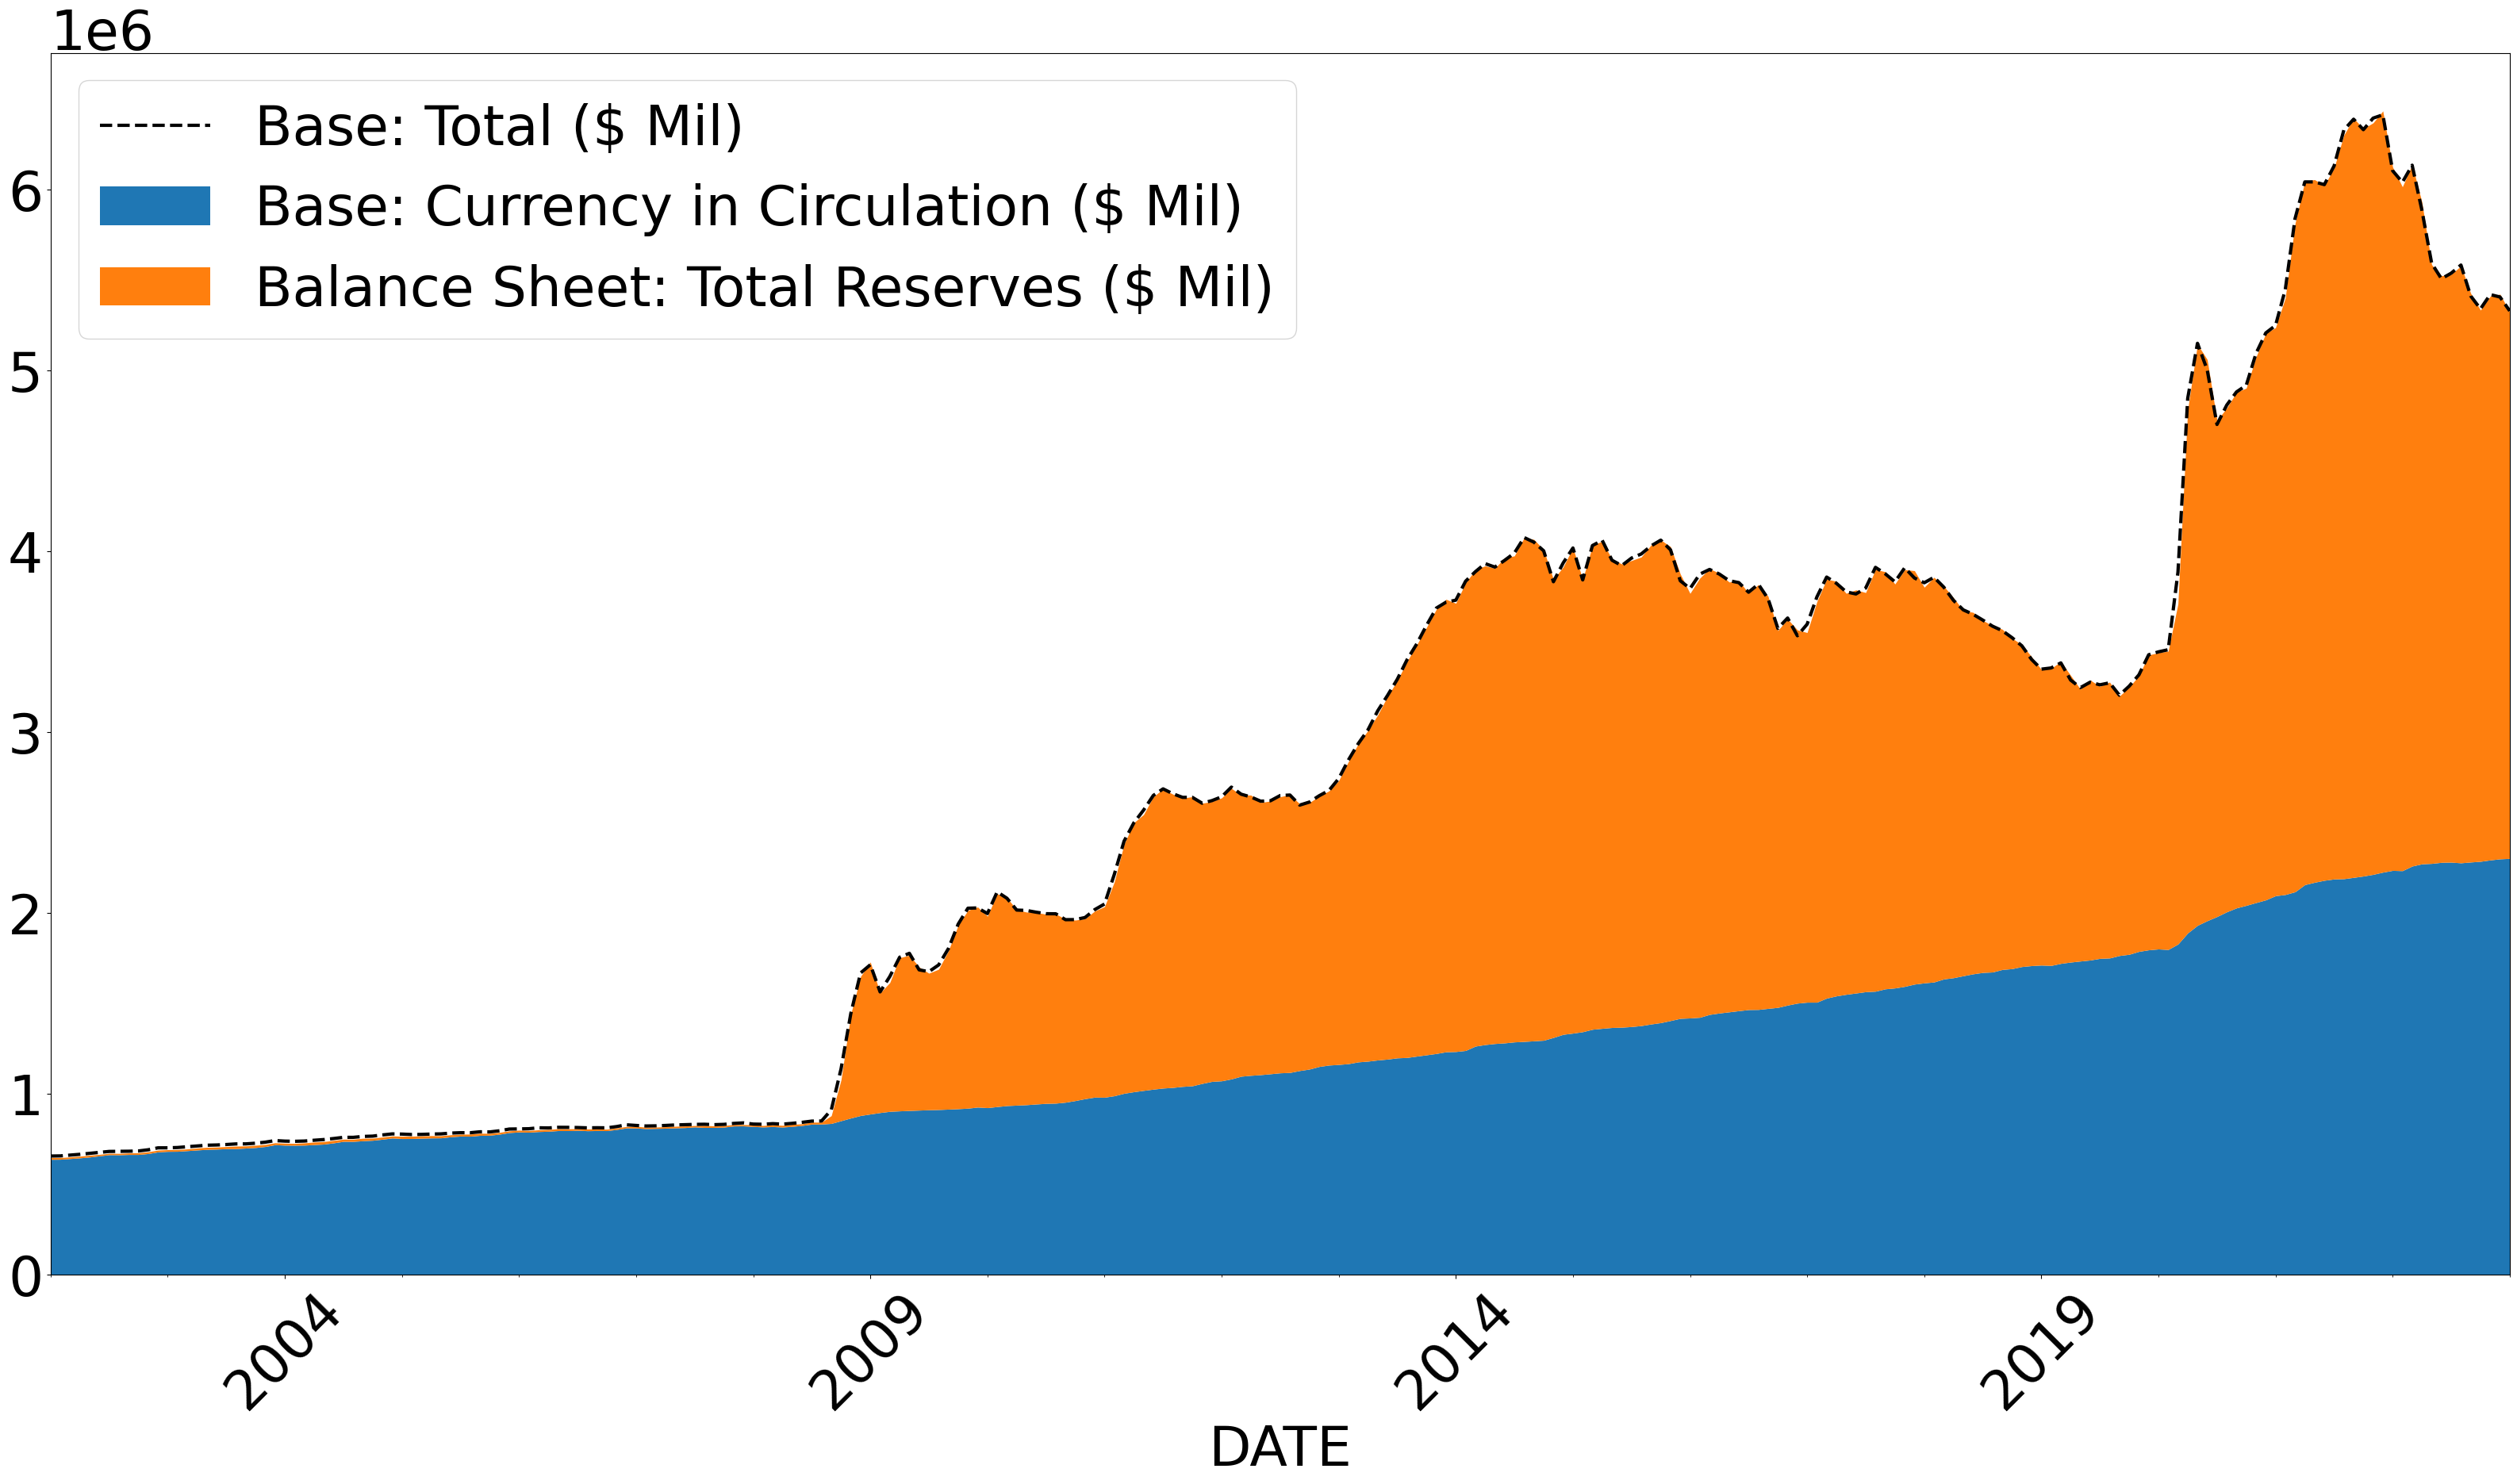

In [23]:
stack_vars = ["Base: Currency in Circulation ($ Mil)",
             "Balance Sheet: Total Reserves ($ Mil)"]
fig, ax = plot_stacked(df = data,
                       stack_vars = stack_vars,
                       total_var = total_var)

C:\Users\jacob\AppData\Local\Temp\ipykernel_23156\967659058.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(y,2) for y in y_vals])


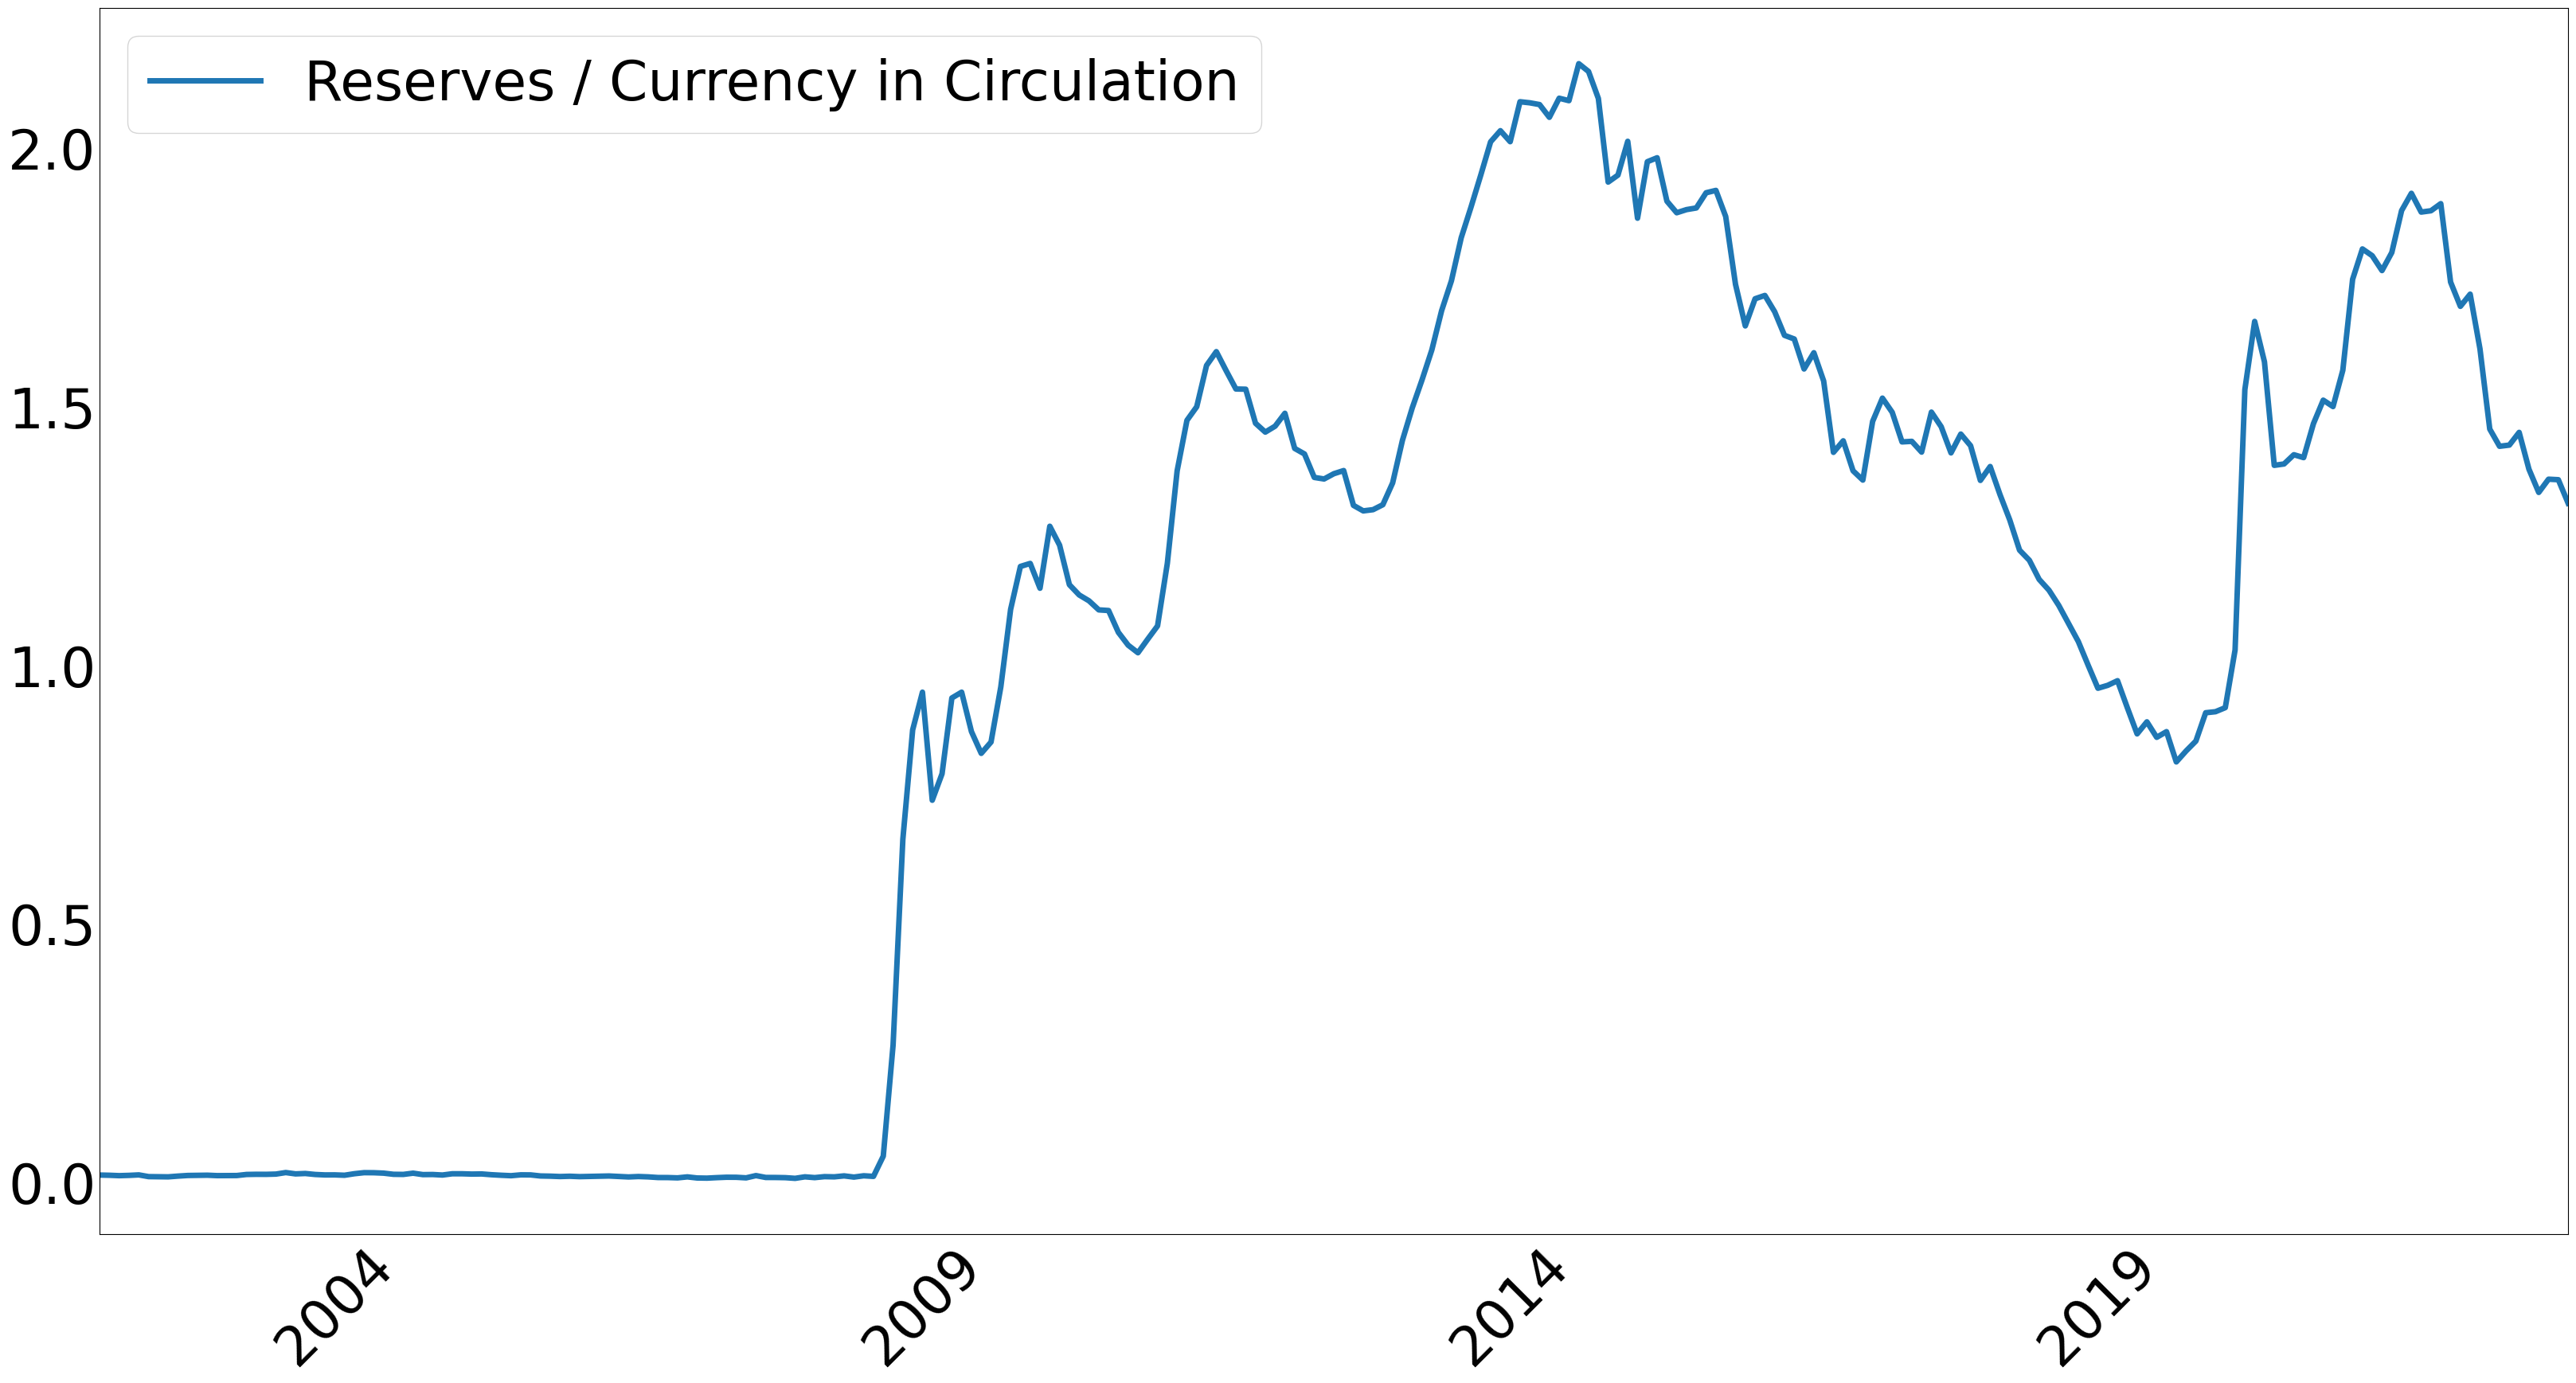

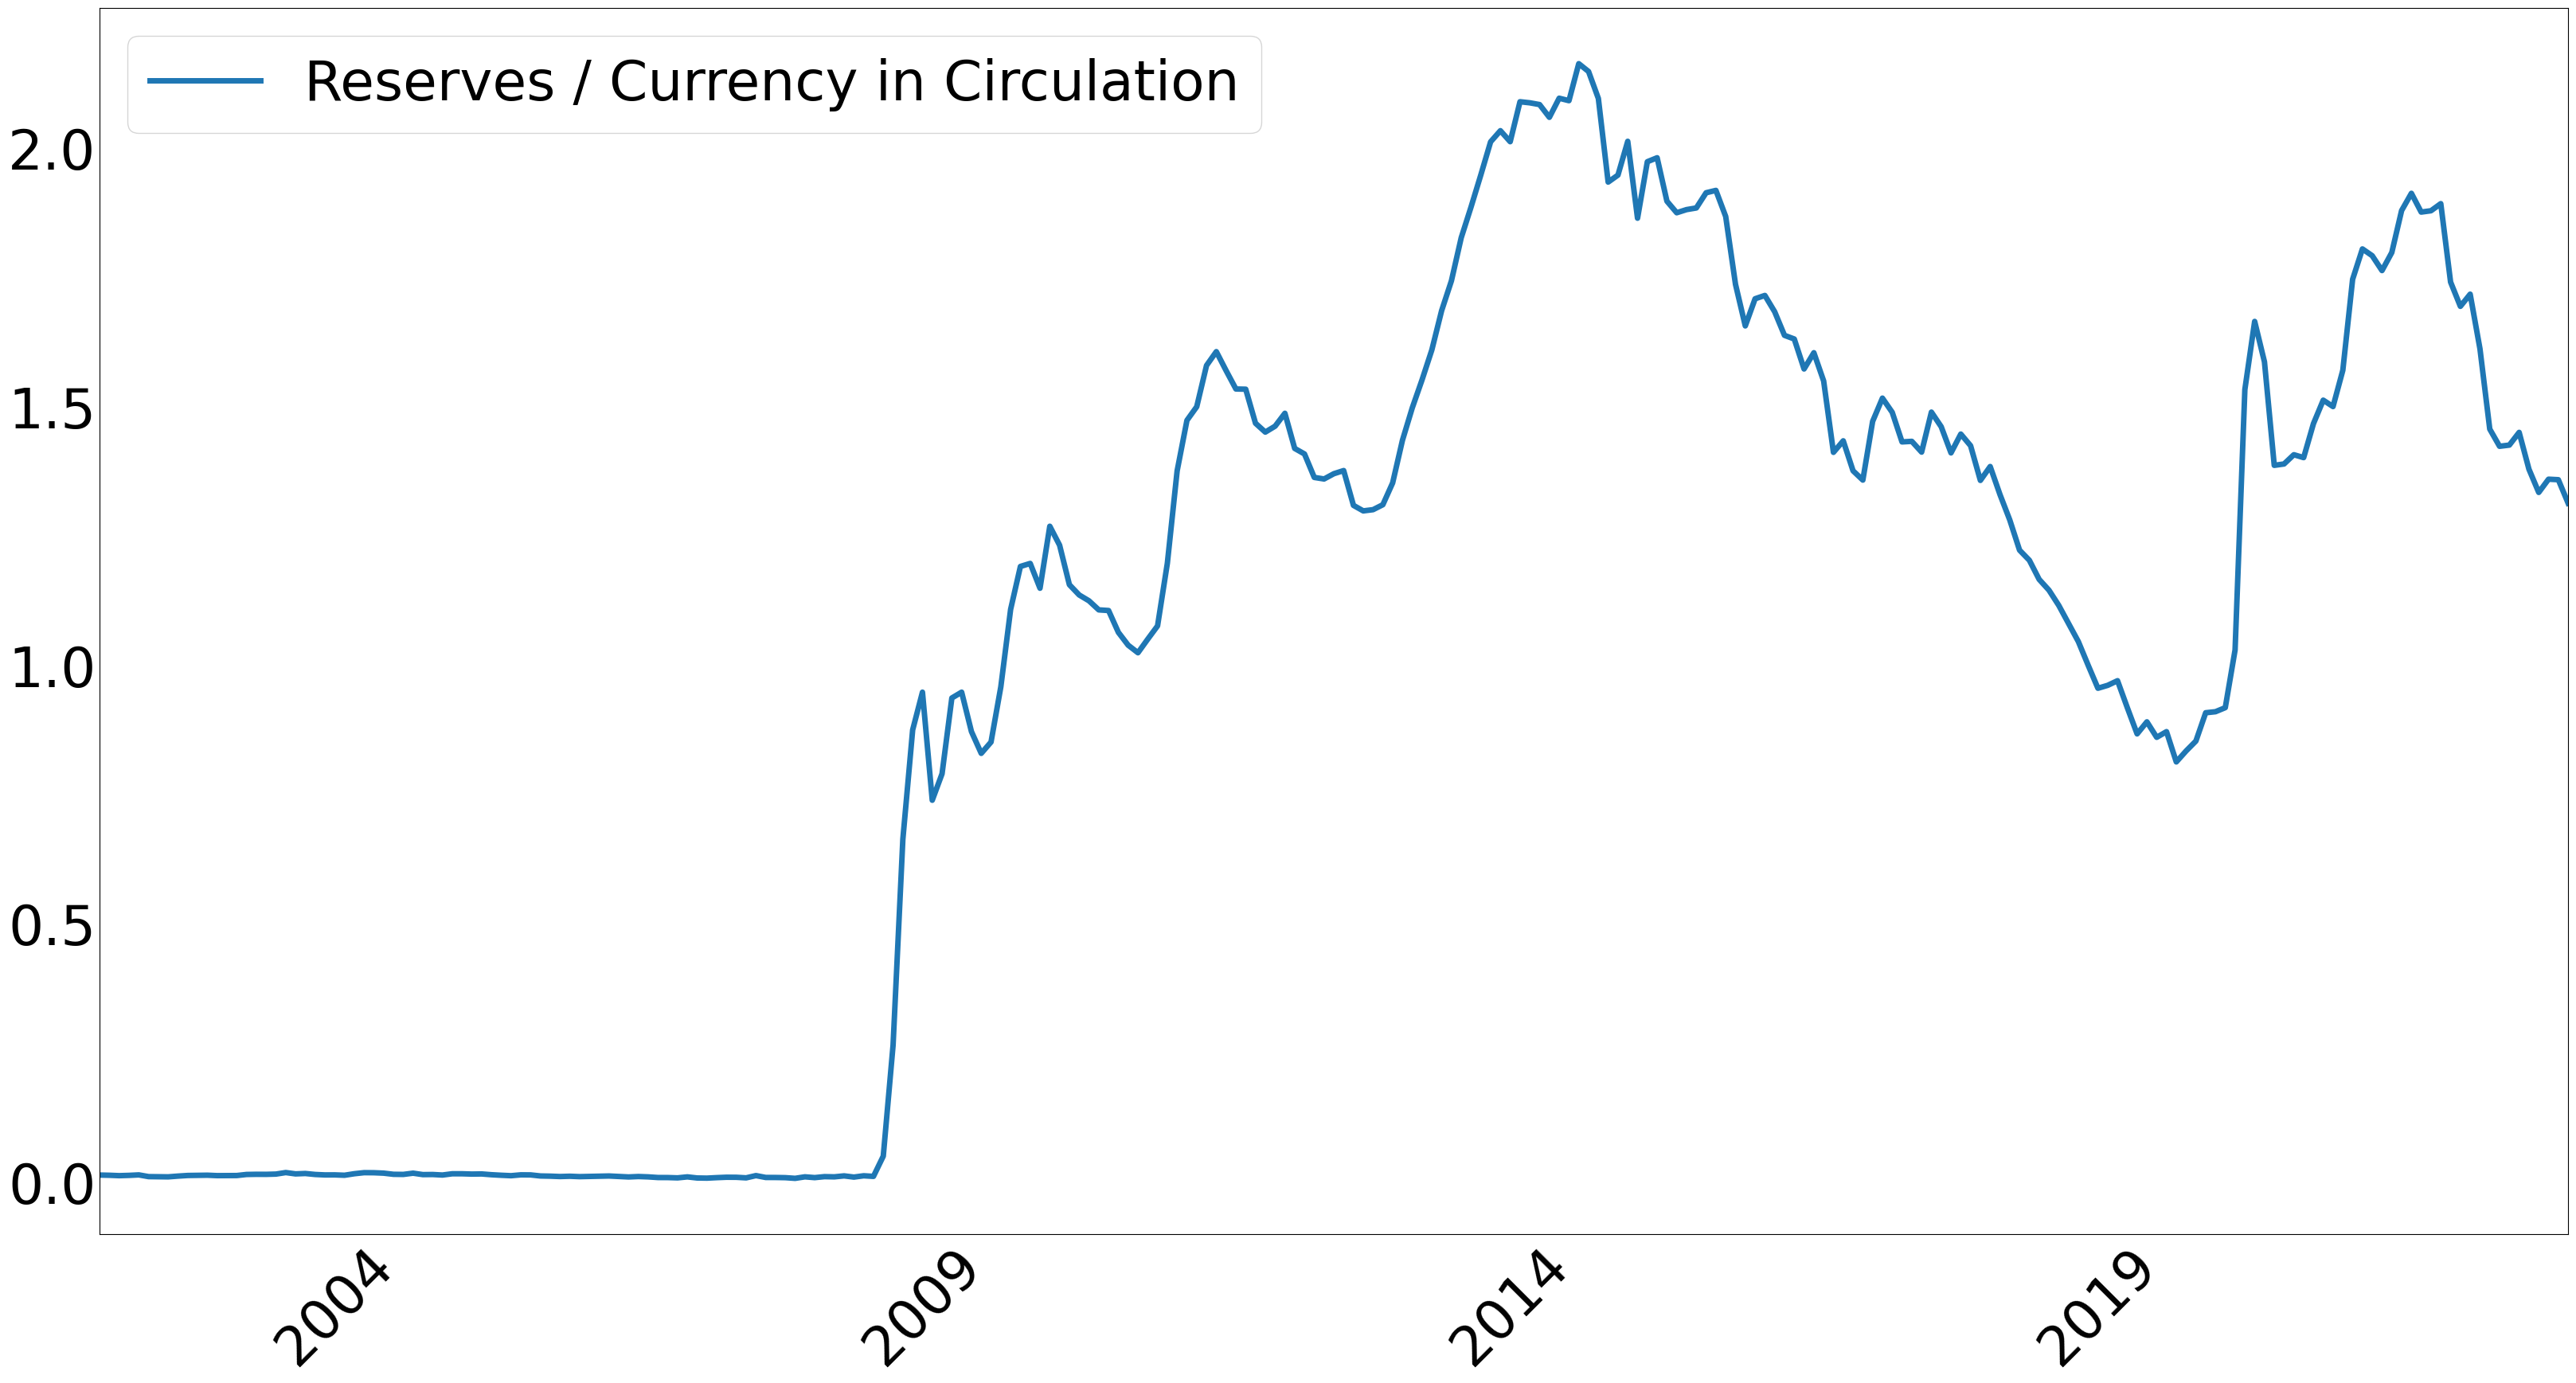

In [24]:
data["Reserves / Currency in Circulation"] = data["Balance Sheet: Total Reserves ($ Mil)"].div(
    data["Base: Currency in Circulation ($ Mil)"])
reserve_vars = ["Reserves / Currency in Circulation"]
plot_df = data[reserve_vars]
plot_lines(plot_df)
fig, ax = plot_lines(plot_df)

(<Figure size 4000x2000 with 1 Axes>, <AxesSubplot:xlabel='DATE'>)

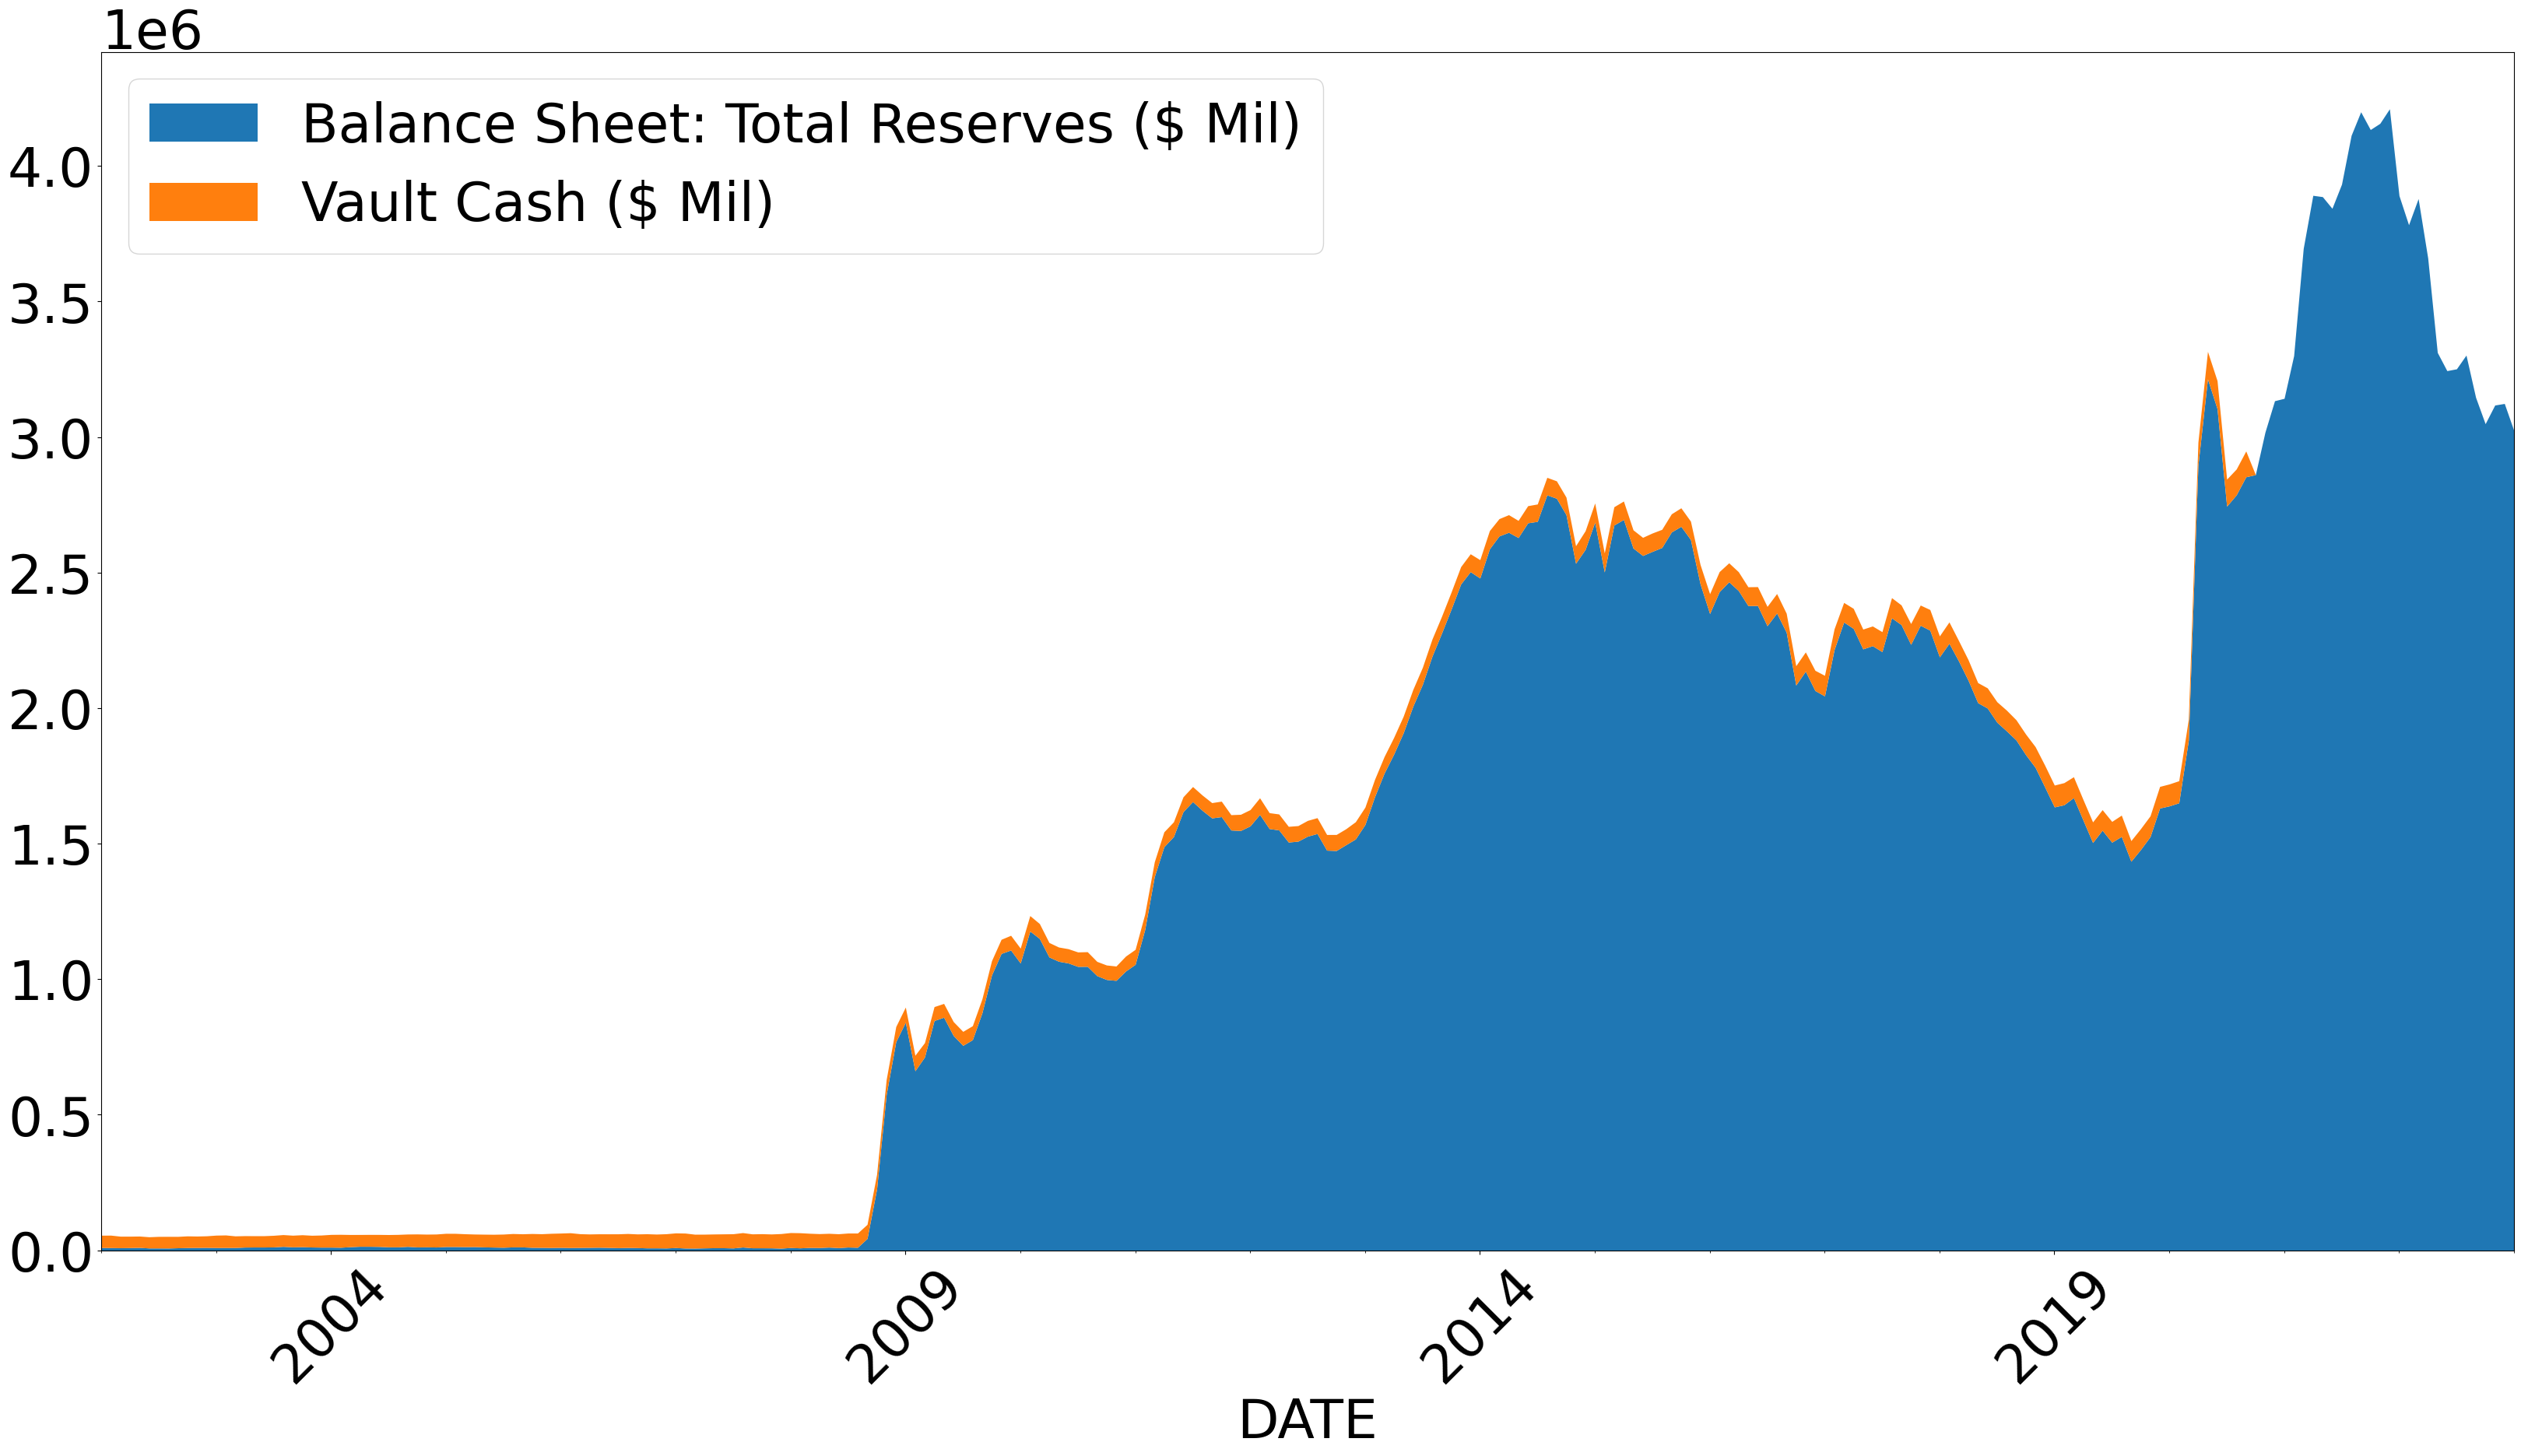

In [25]:
reserve_vars = ["Balance Sheet: Total Reserves ($ Mil)",
                "Vault Cash ($ Mil)"]
plot_stacked(data[reserve_vars], reserve_vars)

## Assets

In [26]:
account_vars = ["Balance Sheet: U.S. Treasuries Held Outright ($ Mil)",
                "Balance Sheet: Securities Held Outright ($ Mil)",
               "Balance Sheet: Federal Agency Debt Securities ($ Mil)",
               "Balance Sheet: Mortgage-Backed Securities ($ Mil)"]
stack_vars = account_vars[1:]
total_var = account_vars[0]
plot_data = data[account_vars]
plot_data.dropna()

Balance Sheet: U.S. Treasuries Held Outright ($ Mil)  \
DATE                                                               
2002-12-31                                          629399.50      
2003-01-31                                          629406.00      
2003-02-28                                          631901.75      
2003-03-31                                          639158.25      
2003-04-30                                          645498.60      
...                                                       ...      
2022-09-30                                         5680889.50      
2022-10-31                                         5621114.50      
2022-11-30                                         5547311.00      
2022-12-31                                         5507528.50      
2023-01-31                                         5446620.25      

            Balance Sheet: Securities Held Outright ($ Mil)  \
DATE                                                          
2002-12-31                                        629409.50   
2003-01-31                                        629416.00   
2003-02-28                                        631911.75   
2003-03-31                                        639168.25   
2003-04-30                                        645508.60   
...                                                     ...   
2022-09-30                                       8393452.25   
2022-10-31                                       8316832.75   
2022-11-30                                       8222611.80   
2022-12-31                                       8162878.50   
2023-01-31                                       8085837.50   

            Balance Sheet: Federal Agency Debt Securities ($ Mil)  \
DATE                                                                
2002-12-31                                               10.0       
2003-01-31                                               10.0       
2003-02-28                                               10.0       
2003-03-31                                               10.0       
2003-04-30                                               10.0       
...                                                       ...       
2022-09-30                                             2347.0       
2022-10-31                                             2347.0       
2022-11-30                                             2347.0       
2022-12-31                                             2347.0       
2023-01-31                                             2347.0       

            Balance Sheet: Mortgage-Backed Securities ($ Mil)  
DATE                                                           
2002-12-31                                               0.00  
2003-01-31                                               0.00  
2003-02-28                                               0.00  
2003-03-31                                               0.00  
2003-04-30                                               0.00  
...                                                       ...  
2022-09-30                                         2710215.50  
2022-10-31                                         2693371.50  
2022-11-30                                         2672953.40  
2022-12-31                                         2653003.25  
2023-01-31                                         2636869.75  

[242 rows x 4 columns]

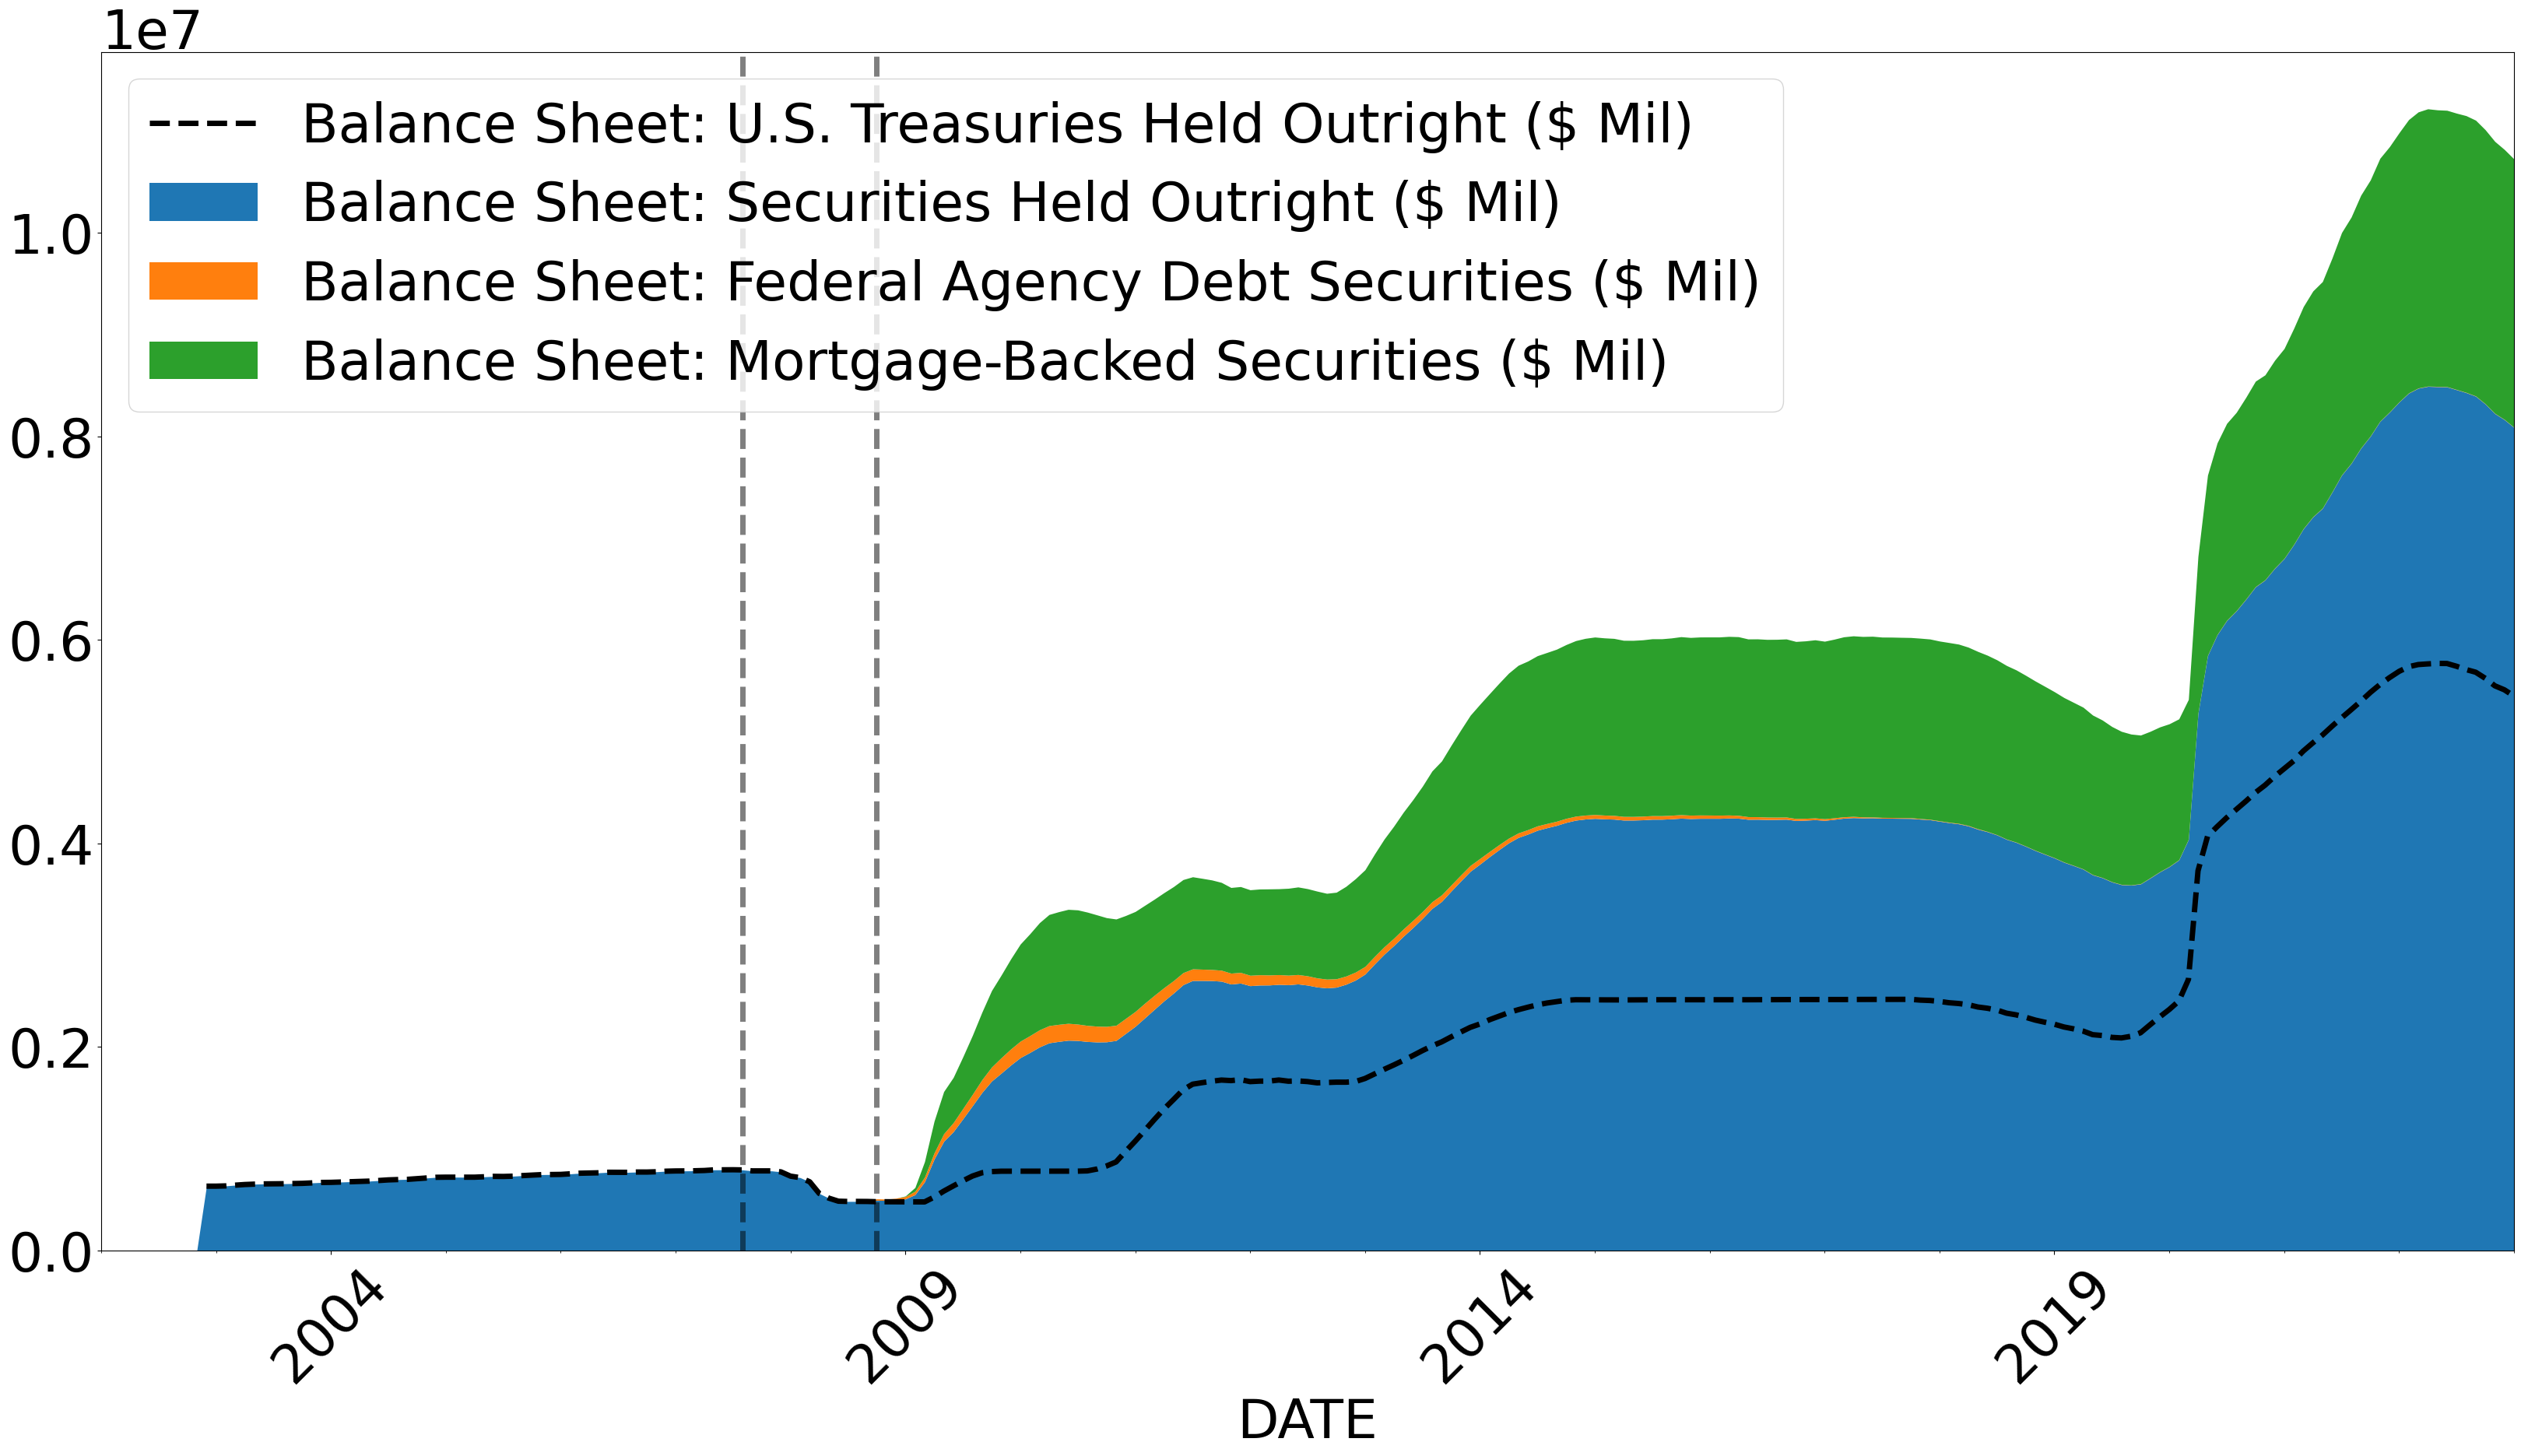

In [27]:
fig, ax = plot_stacked(df = plot_data,
                       linewidth = 5,
                       stack_vars = stack_vars,
                       total_var = total_var)
ax.axvline("2007-08-01",
           ls = "--",
           color = "k",
           linewidth = 5,
           alpha = 0.5)
ax.axvline("2008-10-01",
           ls = "--",
           color = "k",
           linewidth = 5,
           alpha = 0.5)

## from securities to remaining assets

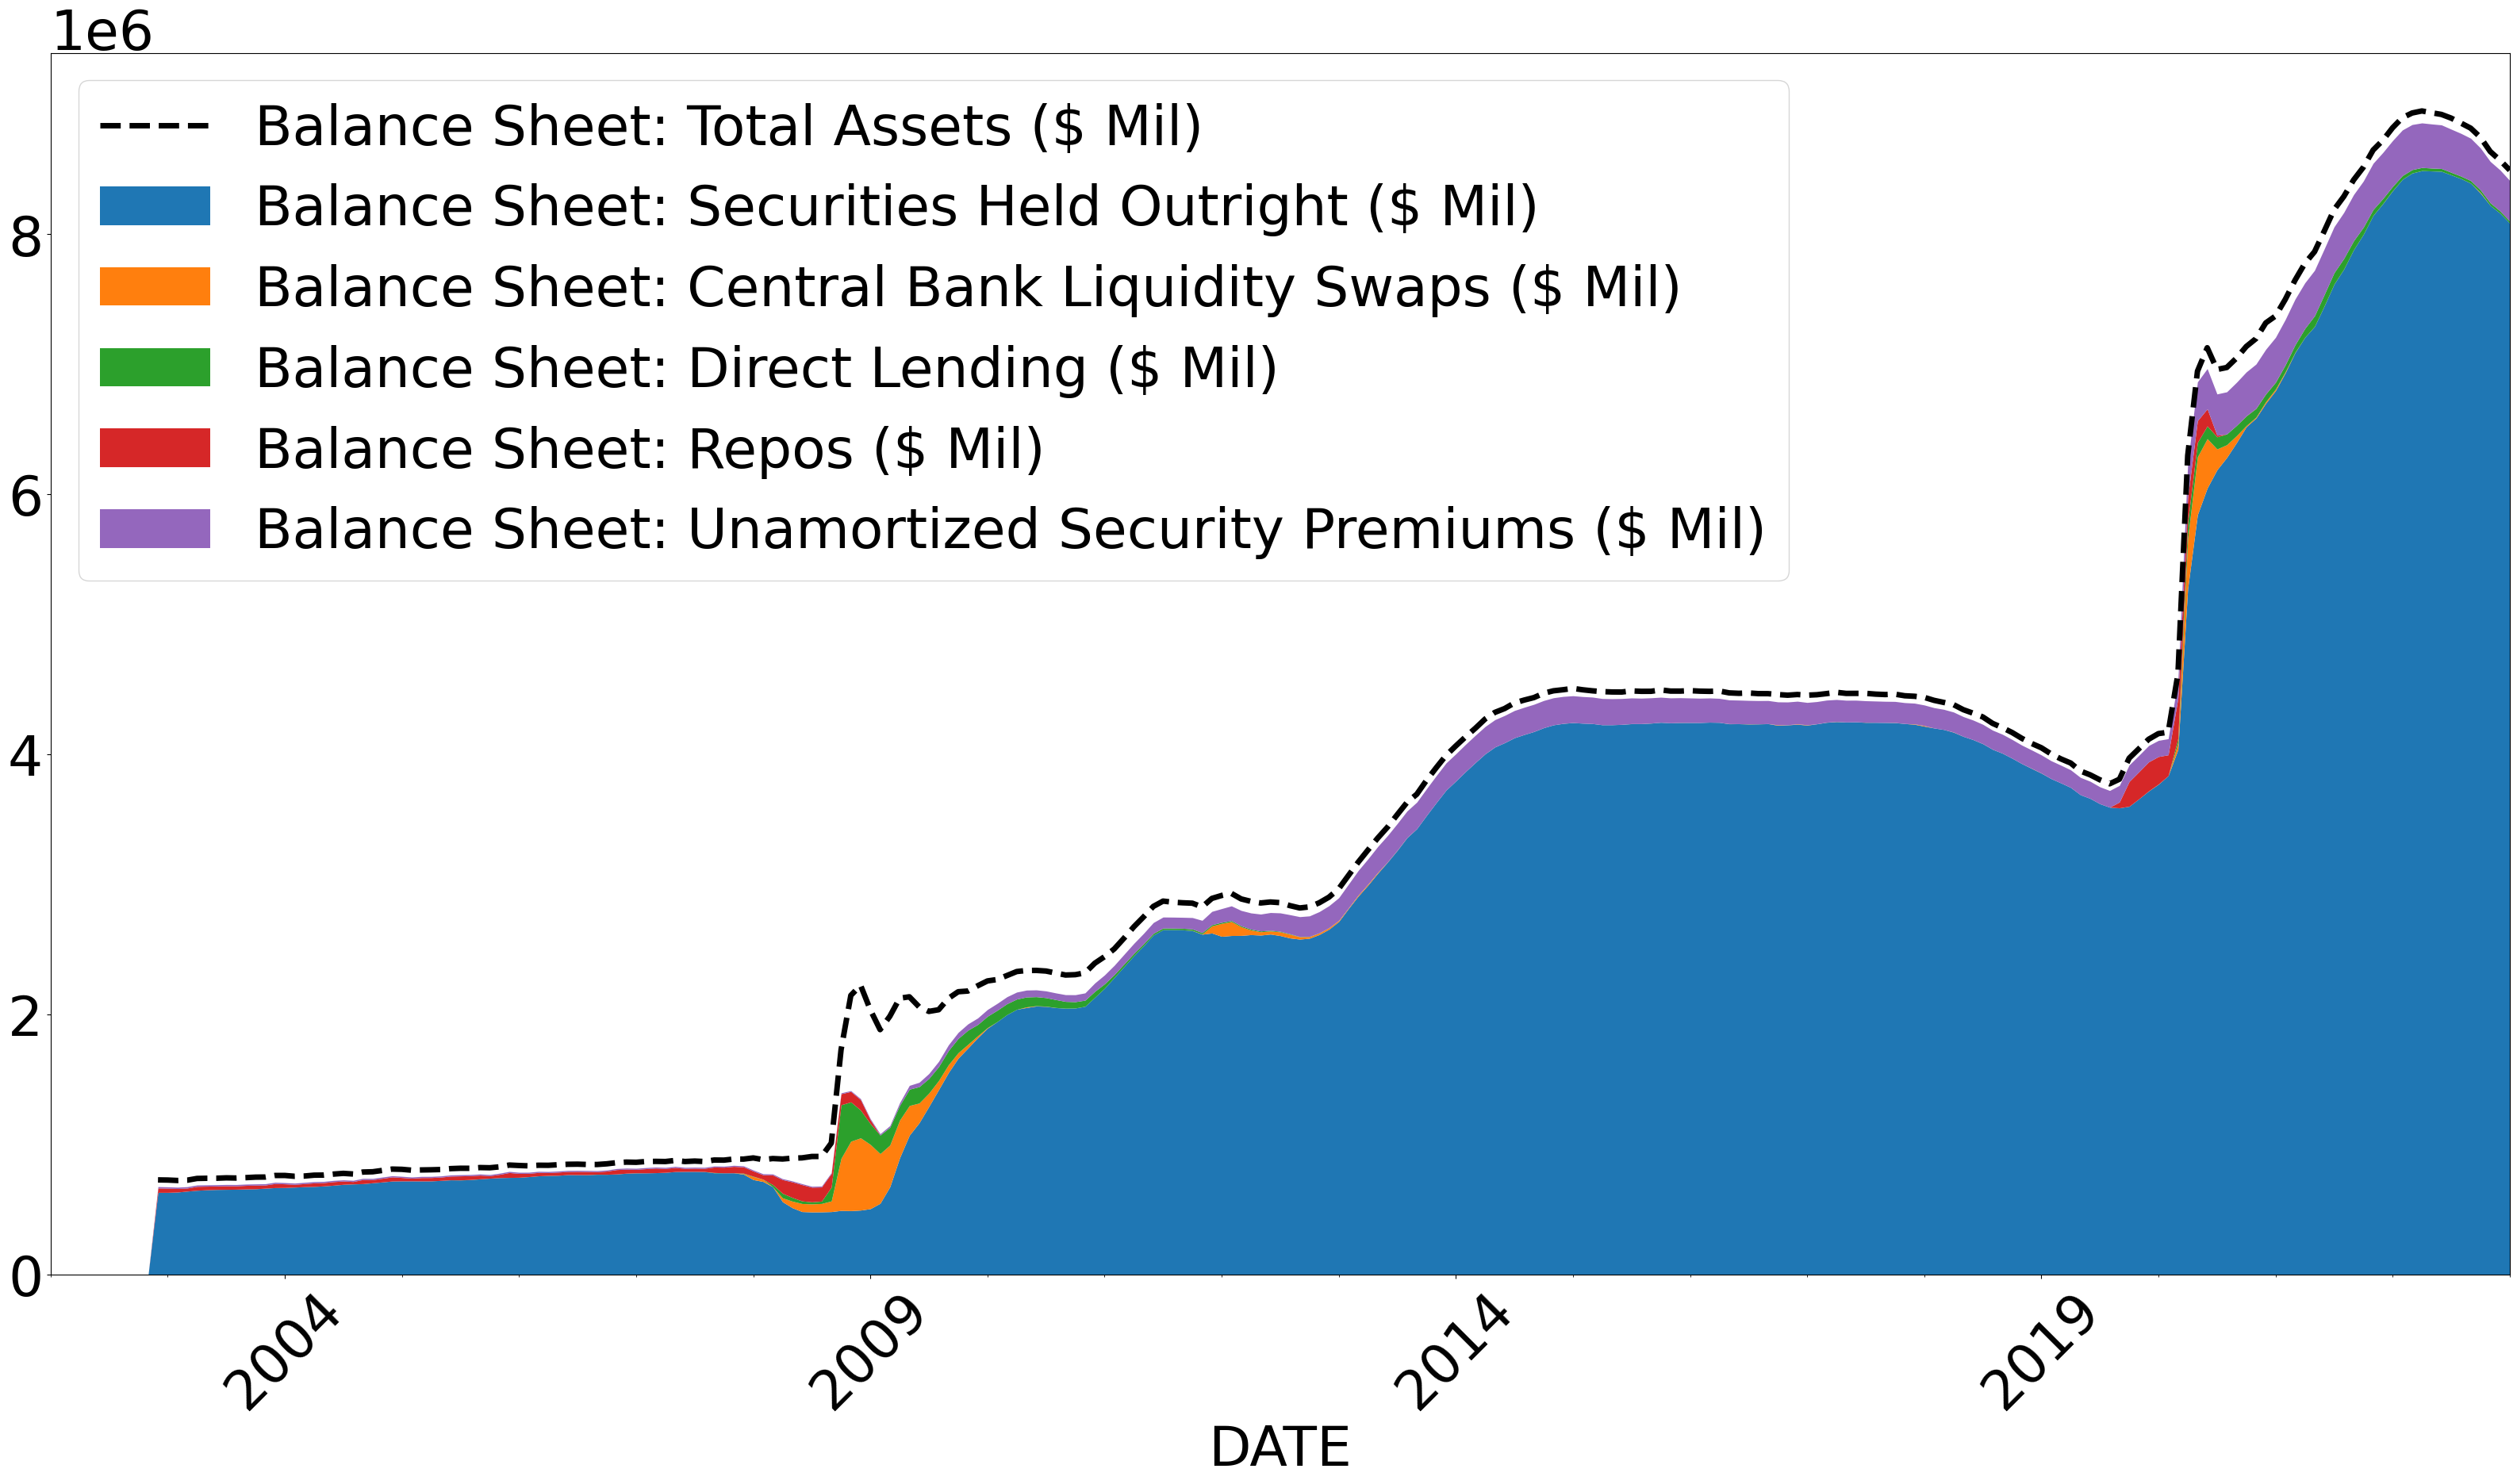

In [28]:
account_vars = ["Balance Sheet: Total Assets ($ Mil)",
                "Balance Sheet: Securities Held Outright ($ Mil)",
               "Balance Sheet: Central Bank Liquidity Swaps ($ Mil)",
               "Balance Sheet: Direct Lending ($ Mil)",
               "Balance Sheet: Repos ($ Mil)",
               "Balance Sheet: Unamortized Security Premiums ($ Mil)"]
plot_data = data[account_vars]
stack_vars = account_vars[1:]
total_var = account_vars[0]
fig, ax = plot_stacked(df = plot_data,
            linewidth = 5,
            stack_vars = stack_vars,
            total_var = total_var)

## Liabilities

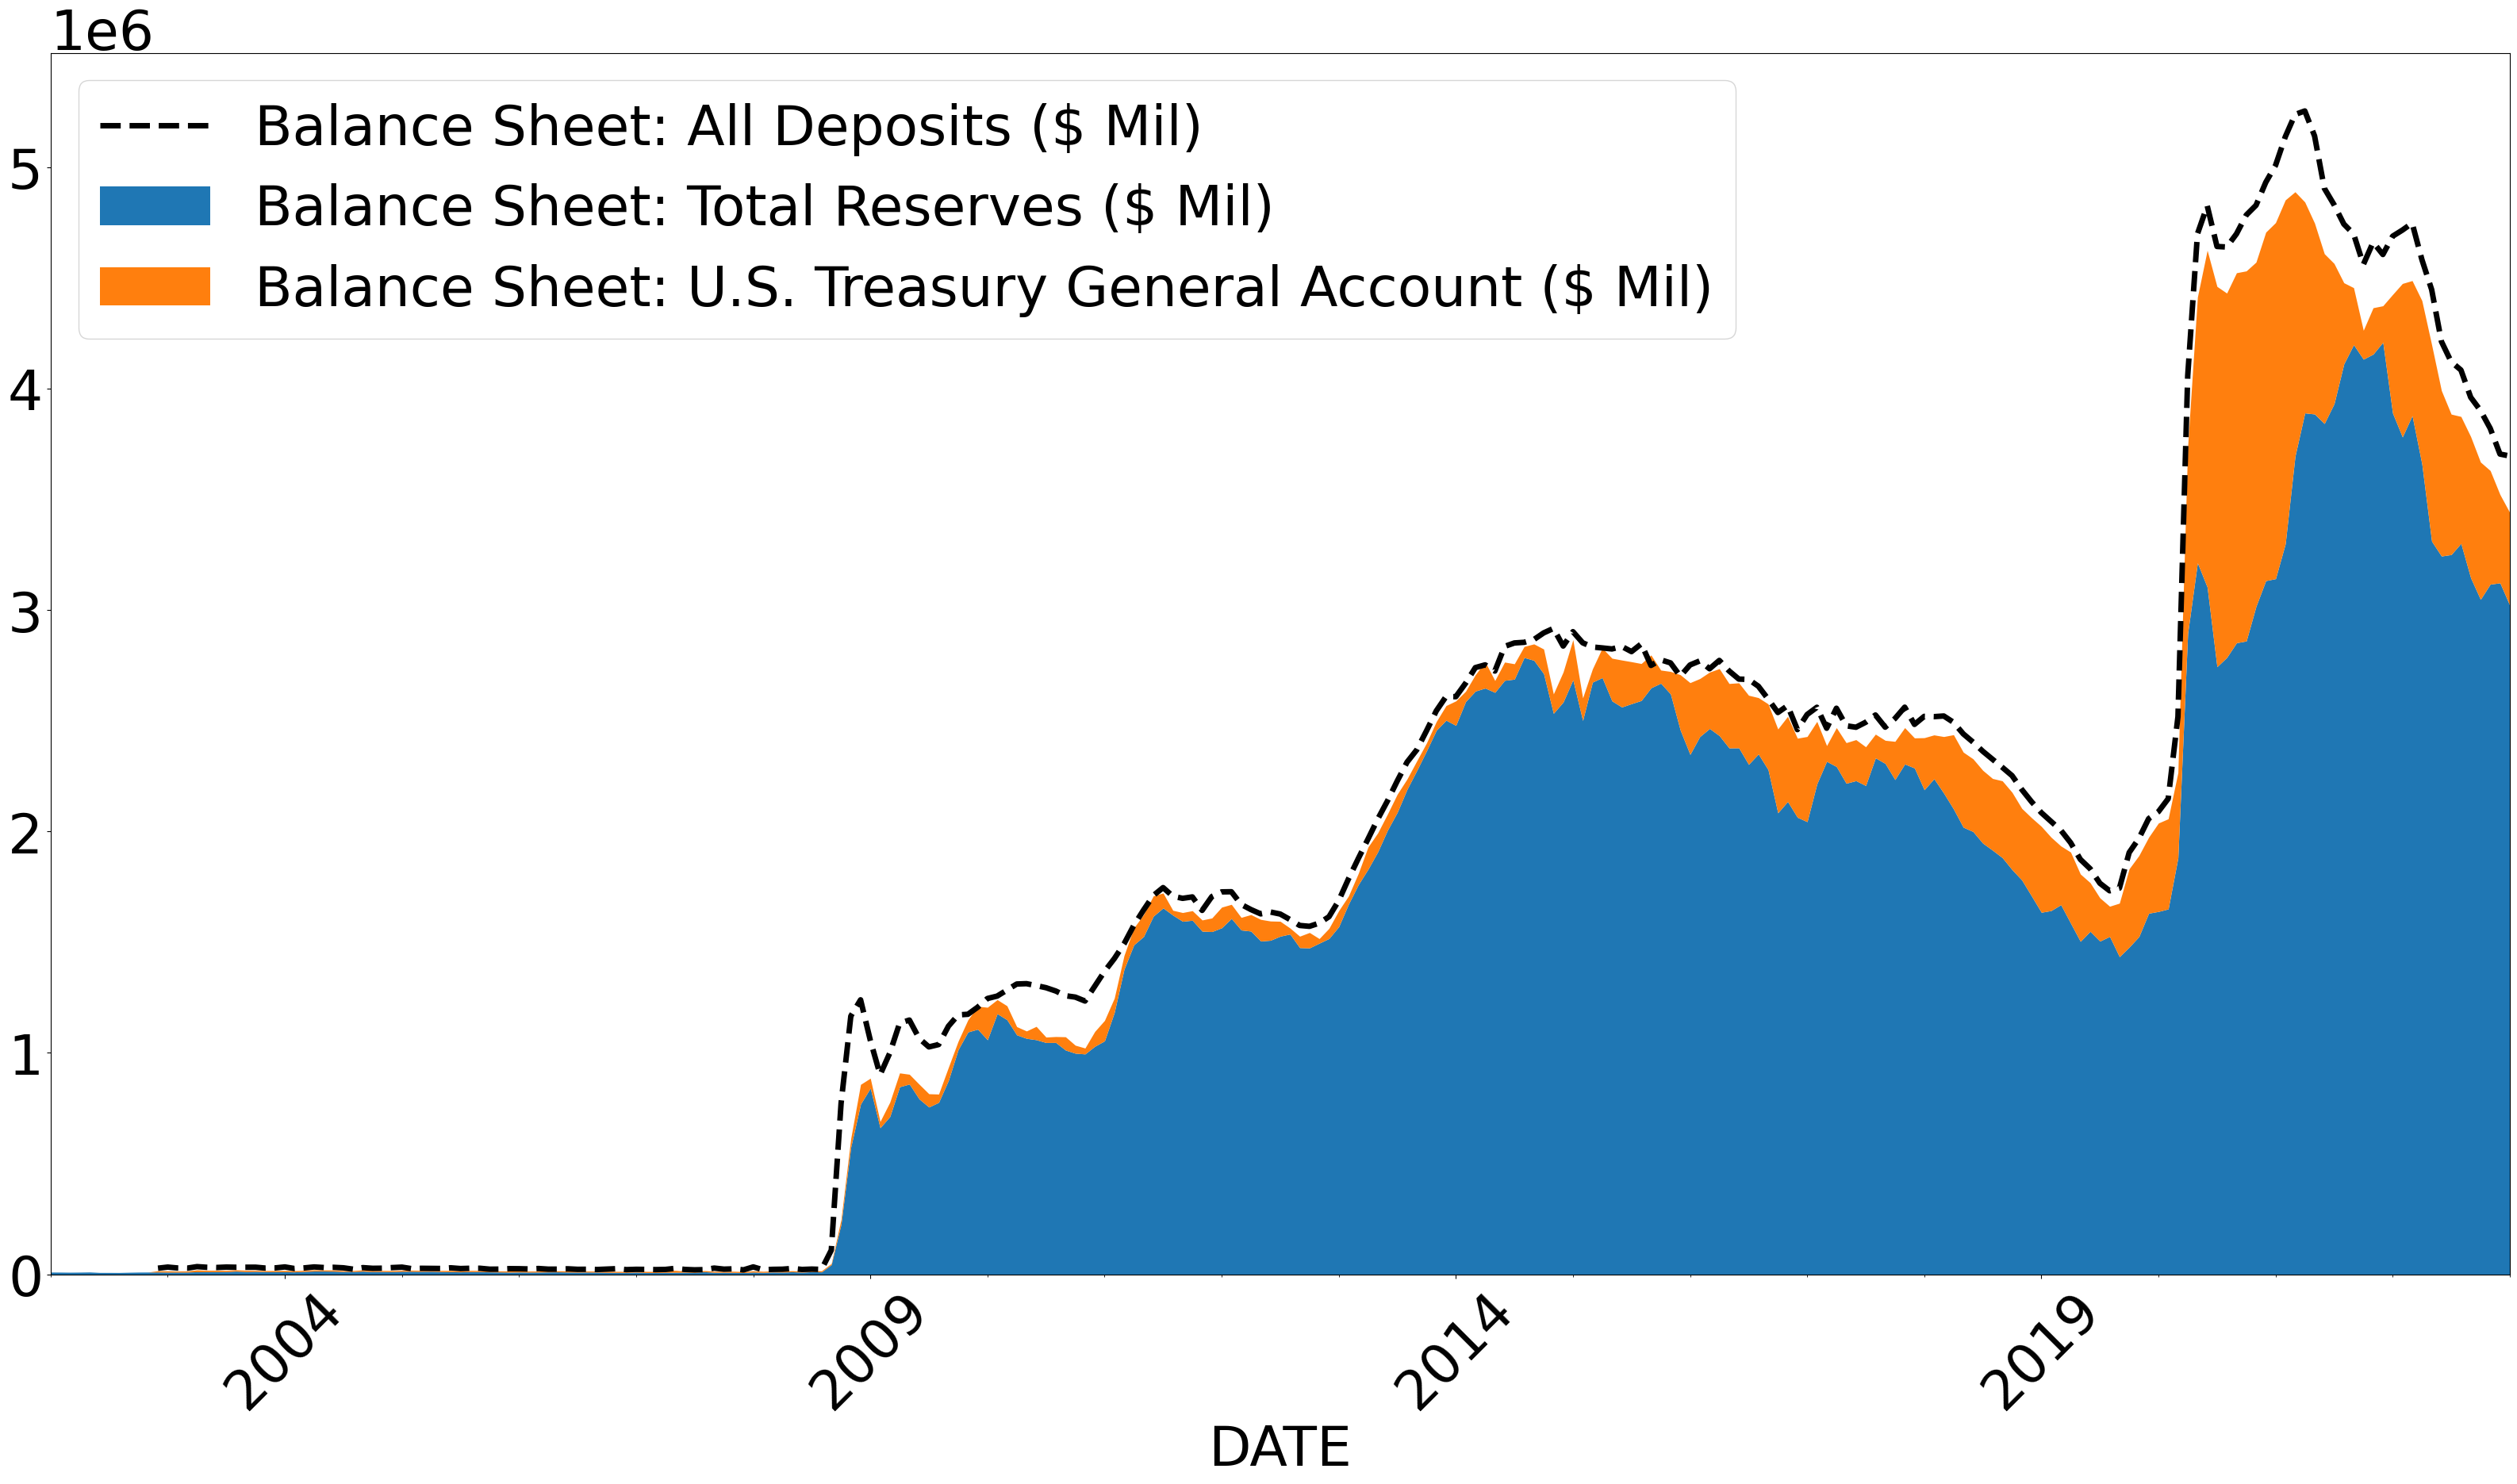

In [29]:
account_vars = ["Balance Sheet: All Deposits ($ Mil)",
                "Balance Sheet: Total Reserves ($ Mil)",
                "Balance Sheet: U.S. Treasury General Account ($ Mil)"]
plot_data = data[account_vars]
stack_vars = account_vars[1:]
total_var = account_vars[0]
fig, ax = plot_stacked(df = plot_data,
            linewidth = 5,
            stack_vars = stack_vars,
            total_var = total_var)

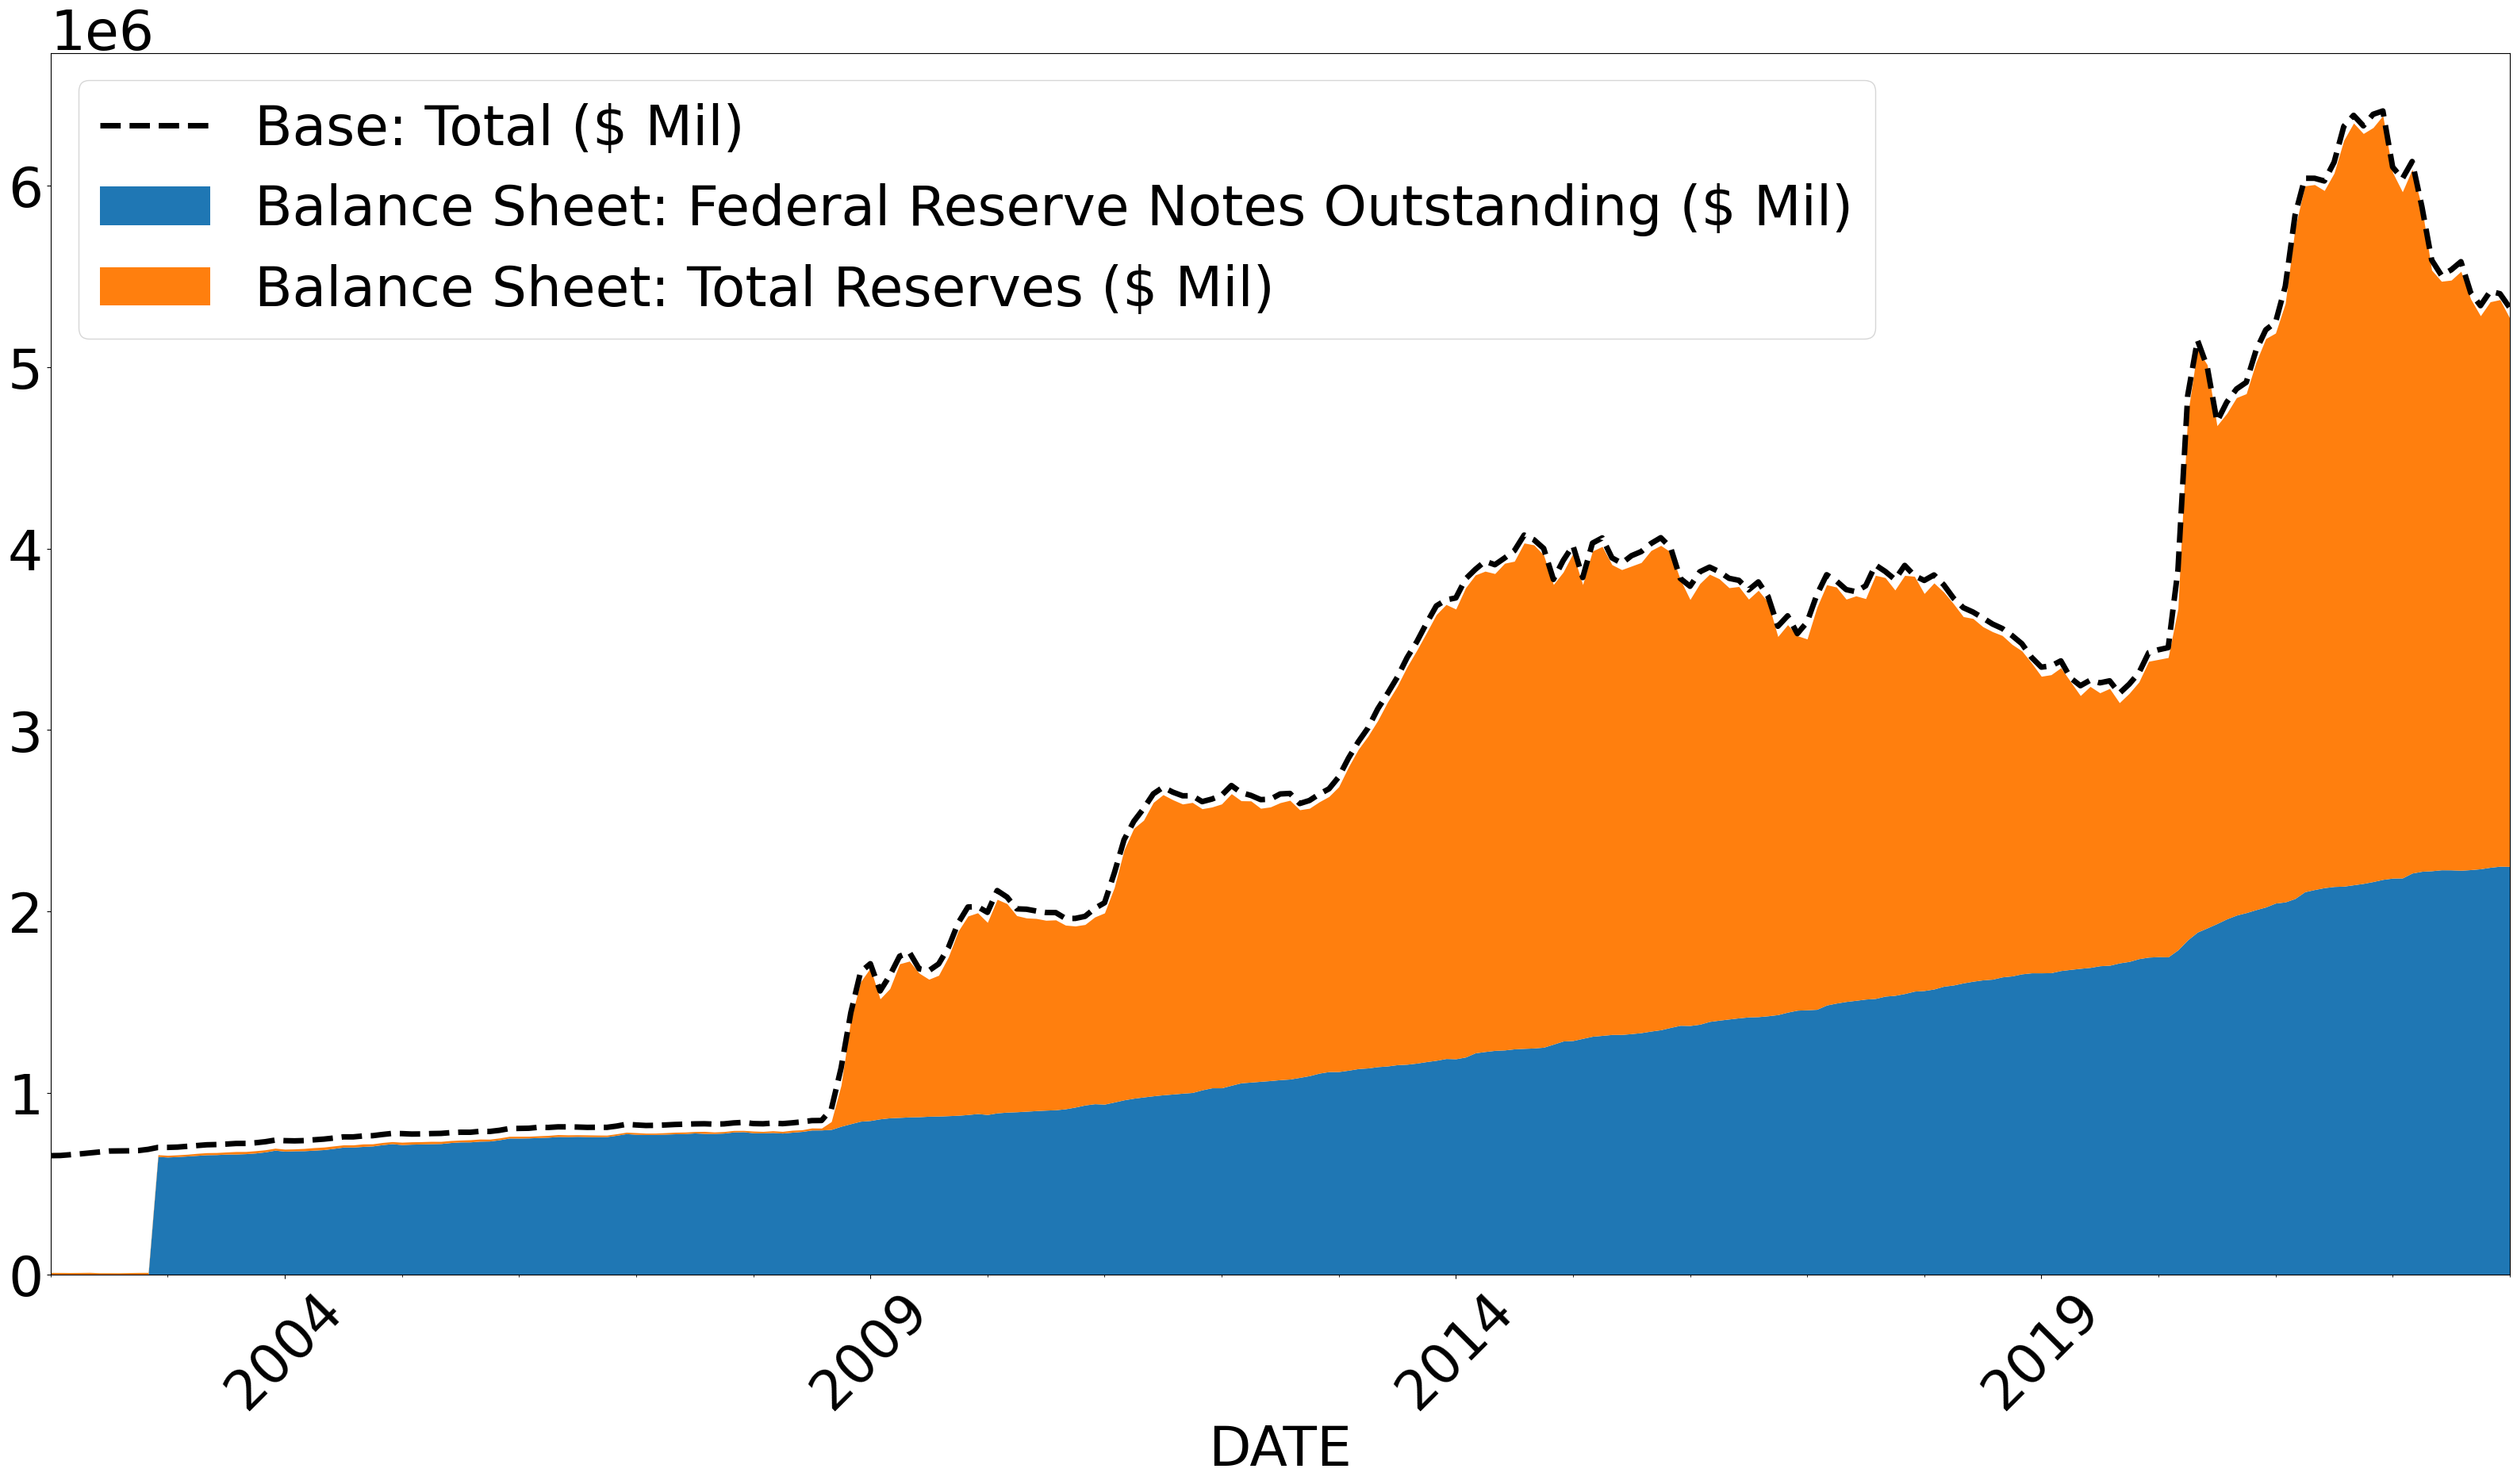

In [30]:
account_vars = ["Base: Total ($ Mil)",
                "Balance Sheet: Federal Reserve Notes Outstanding ($ Mil)",
                "Balance Sheet: Total Reserves ($ Mil)"]
plot_data = data[account_vars]
stack_vars = account_vars[1:]
total_var = account_vars[0]
fig, ax = plot_stacked(df = plot_data,
            linewidth = 5,
            stack_vars = stack_vars,
            total_var = total_var)

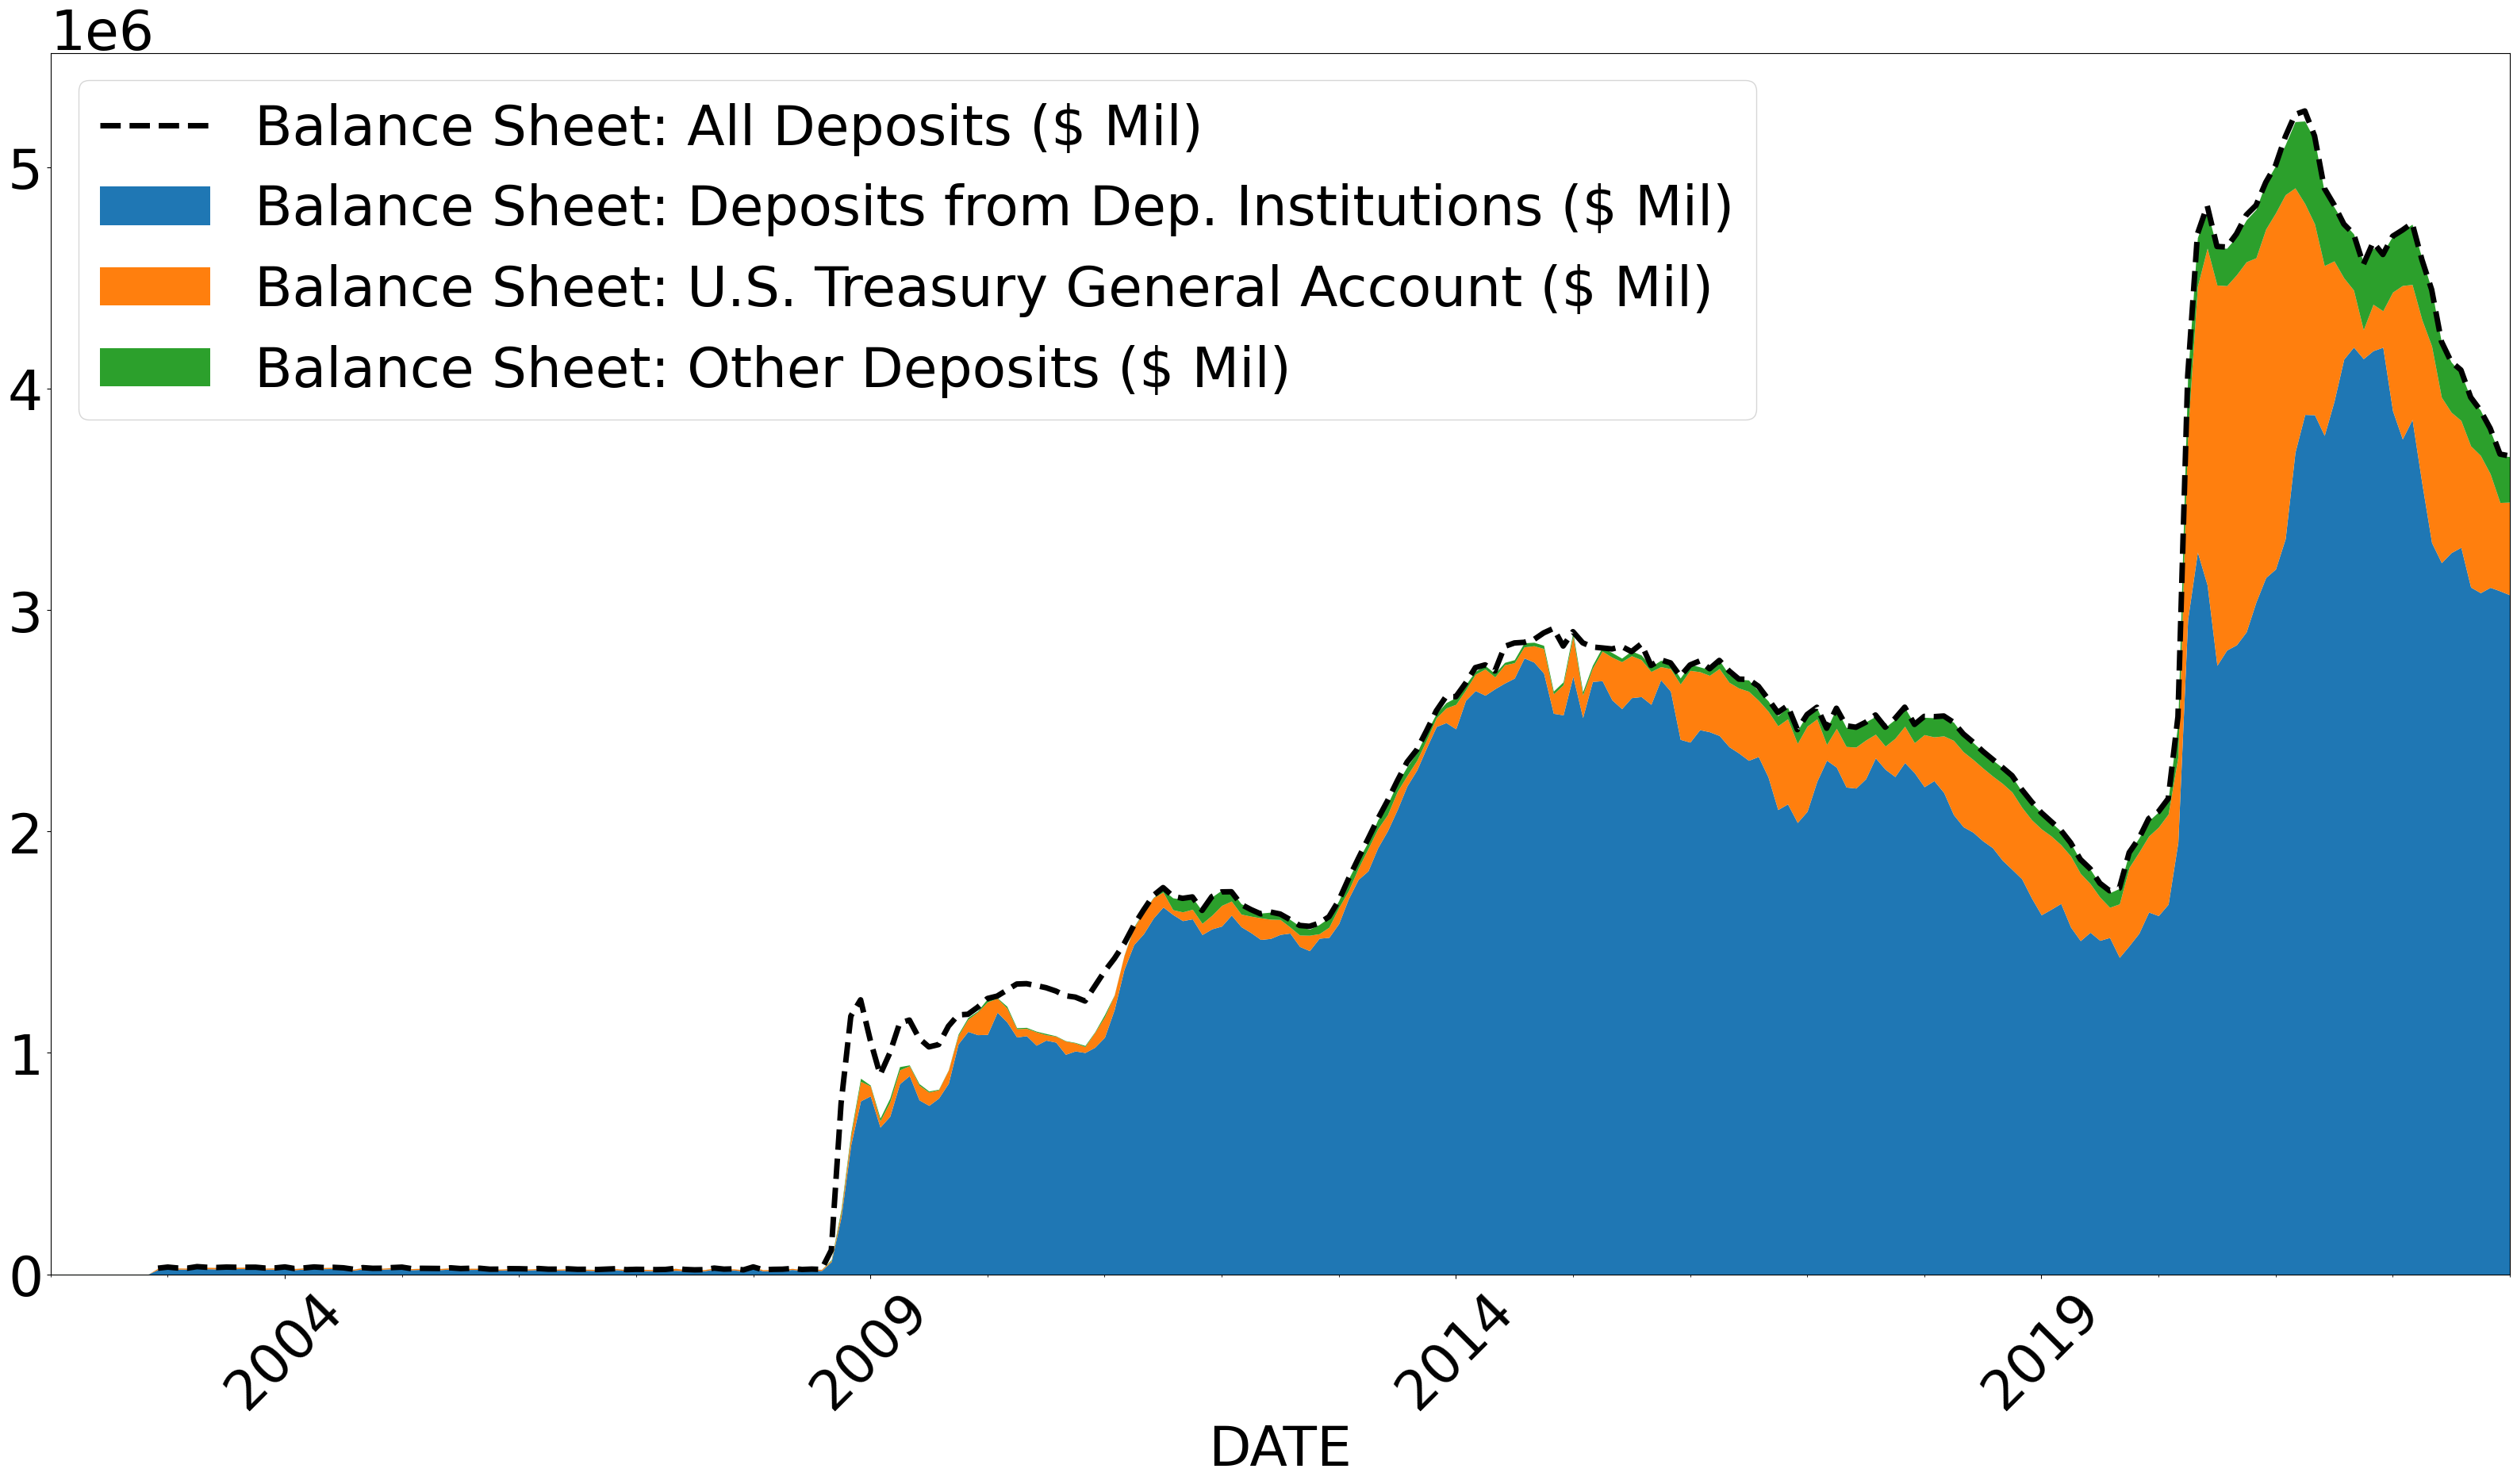

In [31]:
account_vars = ["Balance Sheet: All Deposits ($ Mil)",
                "Balance Sheet: Deposits from Dep. Institutions ($ Mil)",
                "Balance Sheet: U.S. Treasury General Account ($ Mil)",
                "Balance Sheet: Other Deposits ($ Mil)"]
plot_data = data[account_vars]
stack_vars = account_vars[1:]
total_var = account_vars[0]
fig, ax = plot_stacked(df = plot_data,
            linewidth = 5,
            stack_vars = stack_vars,
            total_var = total_var)

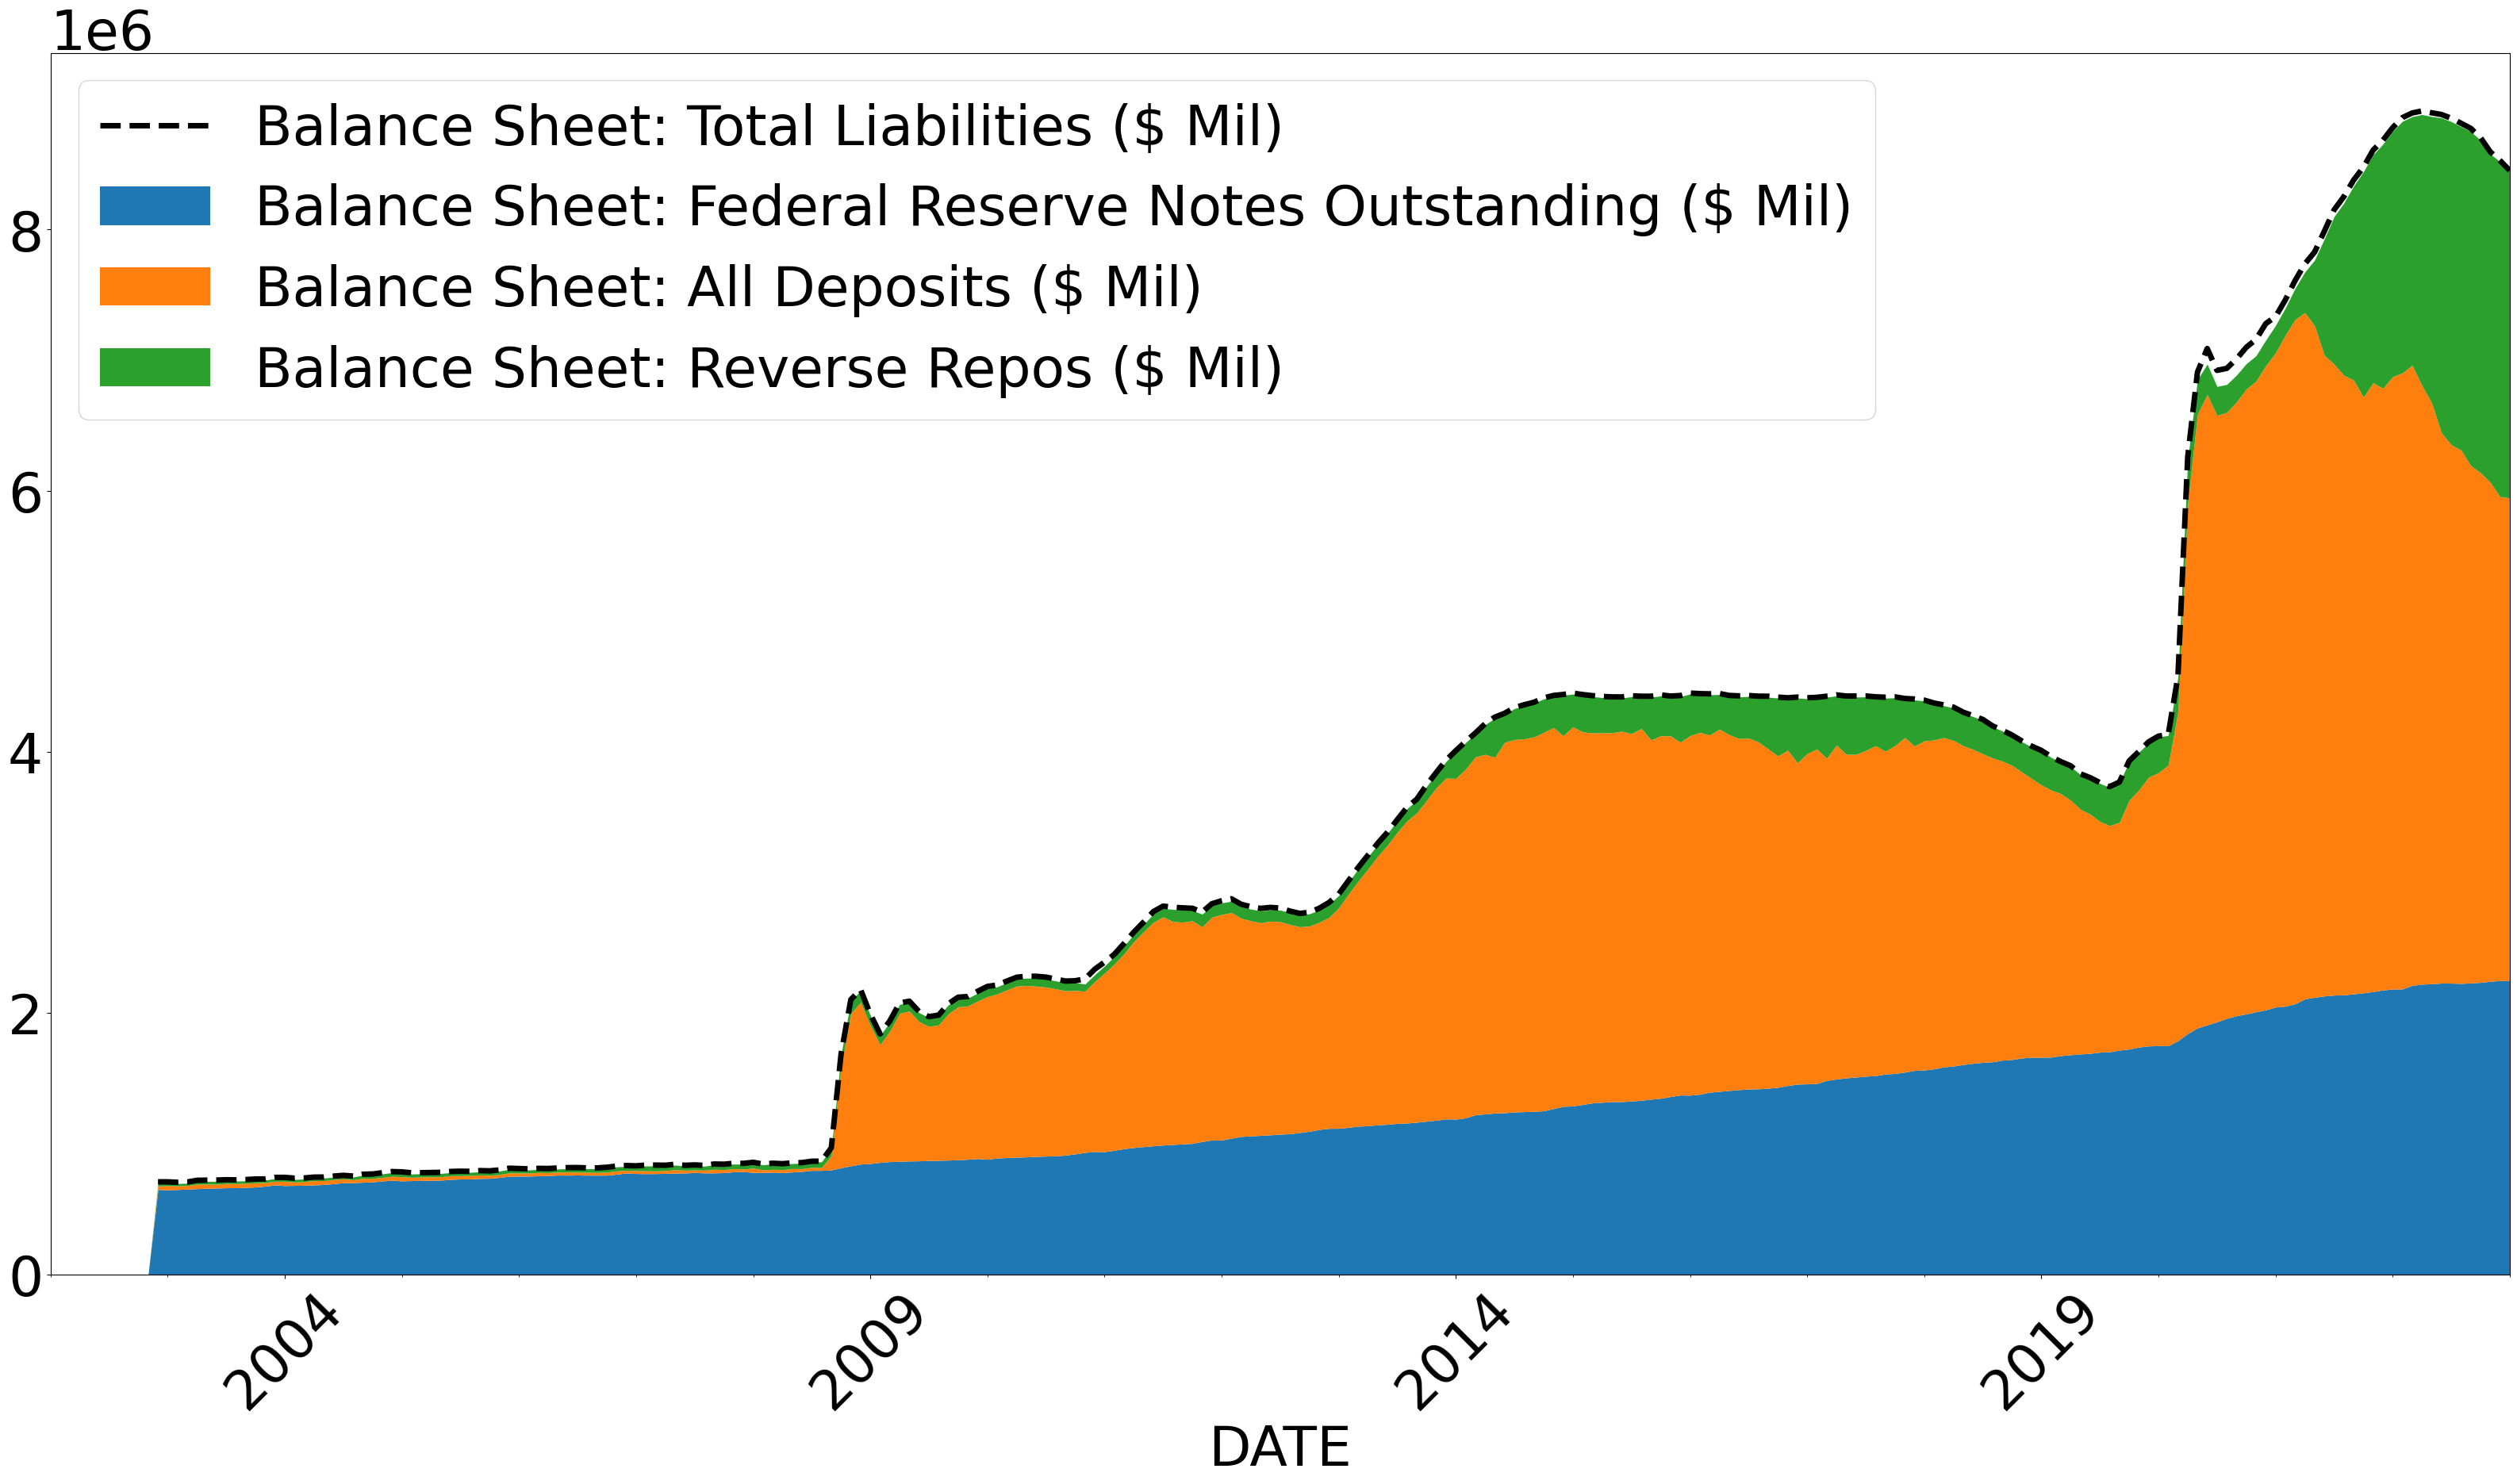

In [32]:
account_vars = ["Balance Sheet: Total Liabilities ($ Mil)",
                # approx circulating currency
                "Balance Sheet: Federal Reserve Notes Outstanding ($ Mil)",
                # federal reserve borrowing
                "Balance Sheet: All Deposits ($ Mil)",
                "Balance Sheet: Reverse Repos ($ Mil)"]
plot_data = data[account_vars]
stack_vars = account_vars[1:]
total_var = account_vars[0]
fig, ax = plot_stacked(df = plot_data,
            linewidth = 5,
            stack_vars = stack_vars,
            total_var = total_var)

## Interbank / Overnight Lending Market
### Repo Operations

C:\Users\jacob\AppData\Local\Temp\ipykernel_23156\967659058.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(y,2) for y in y_vals])


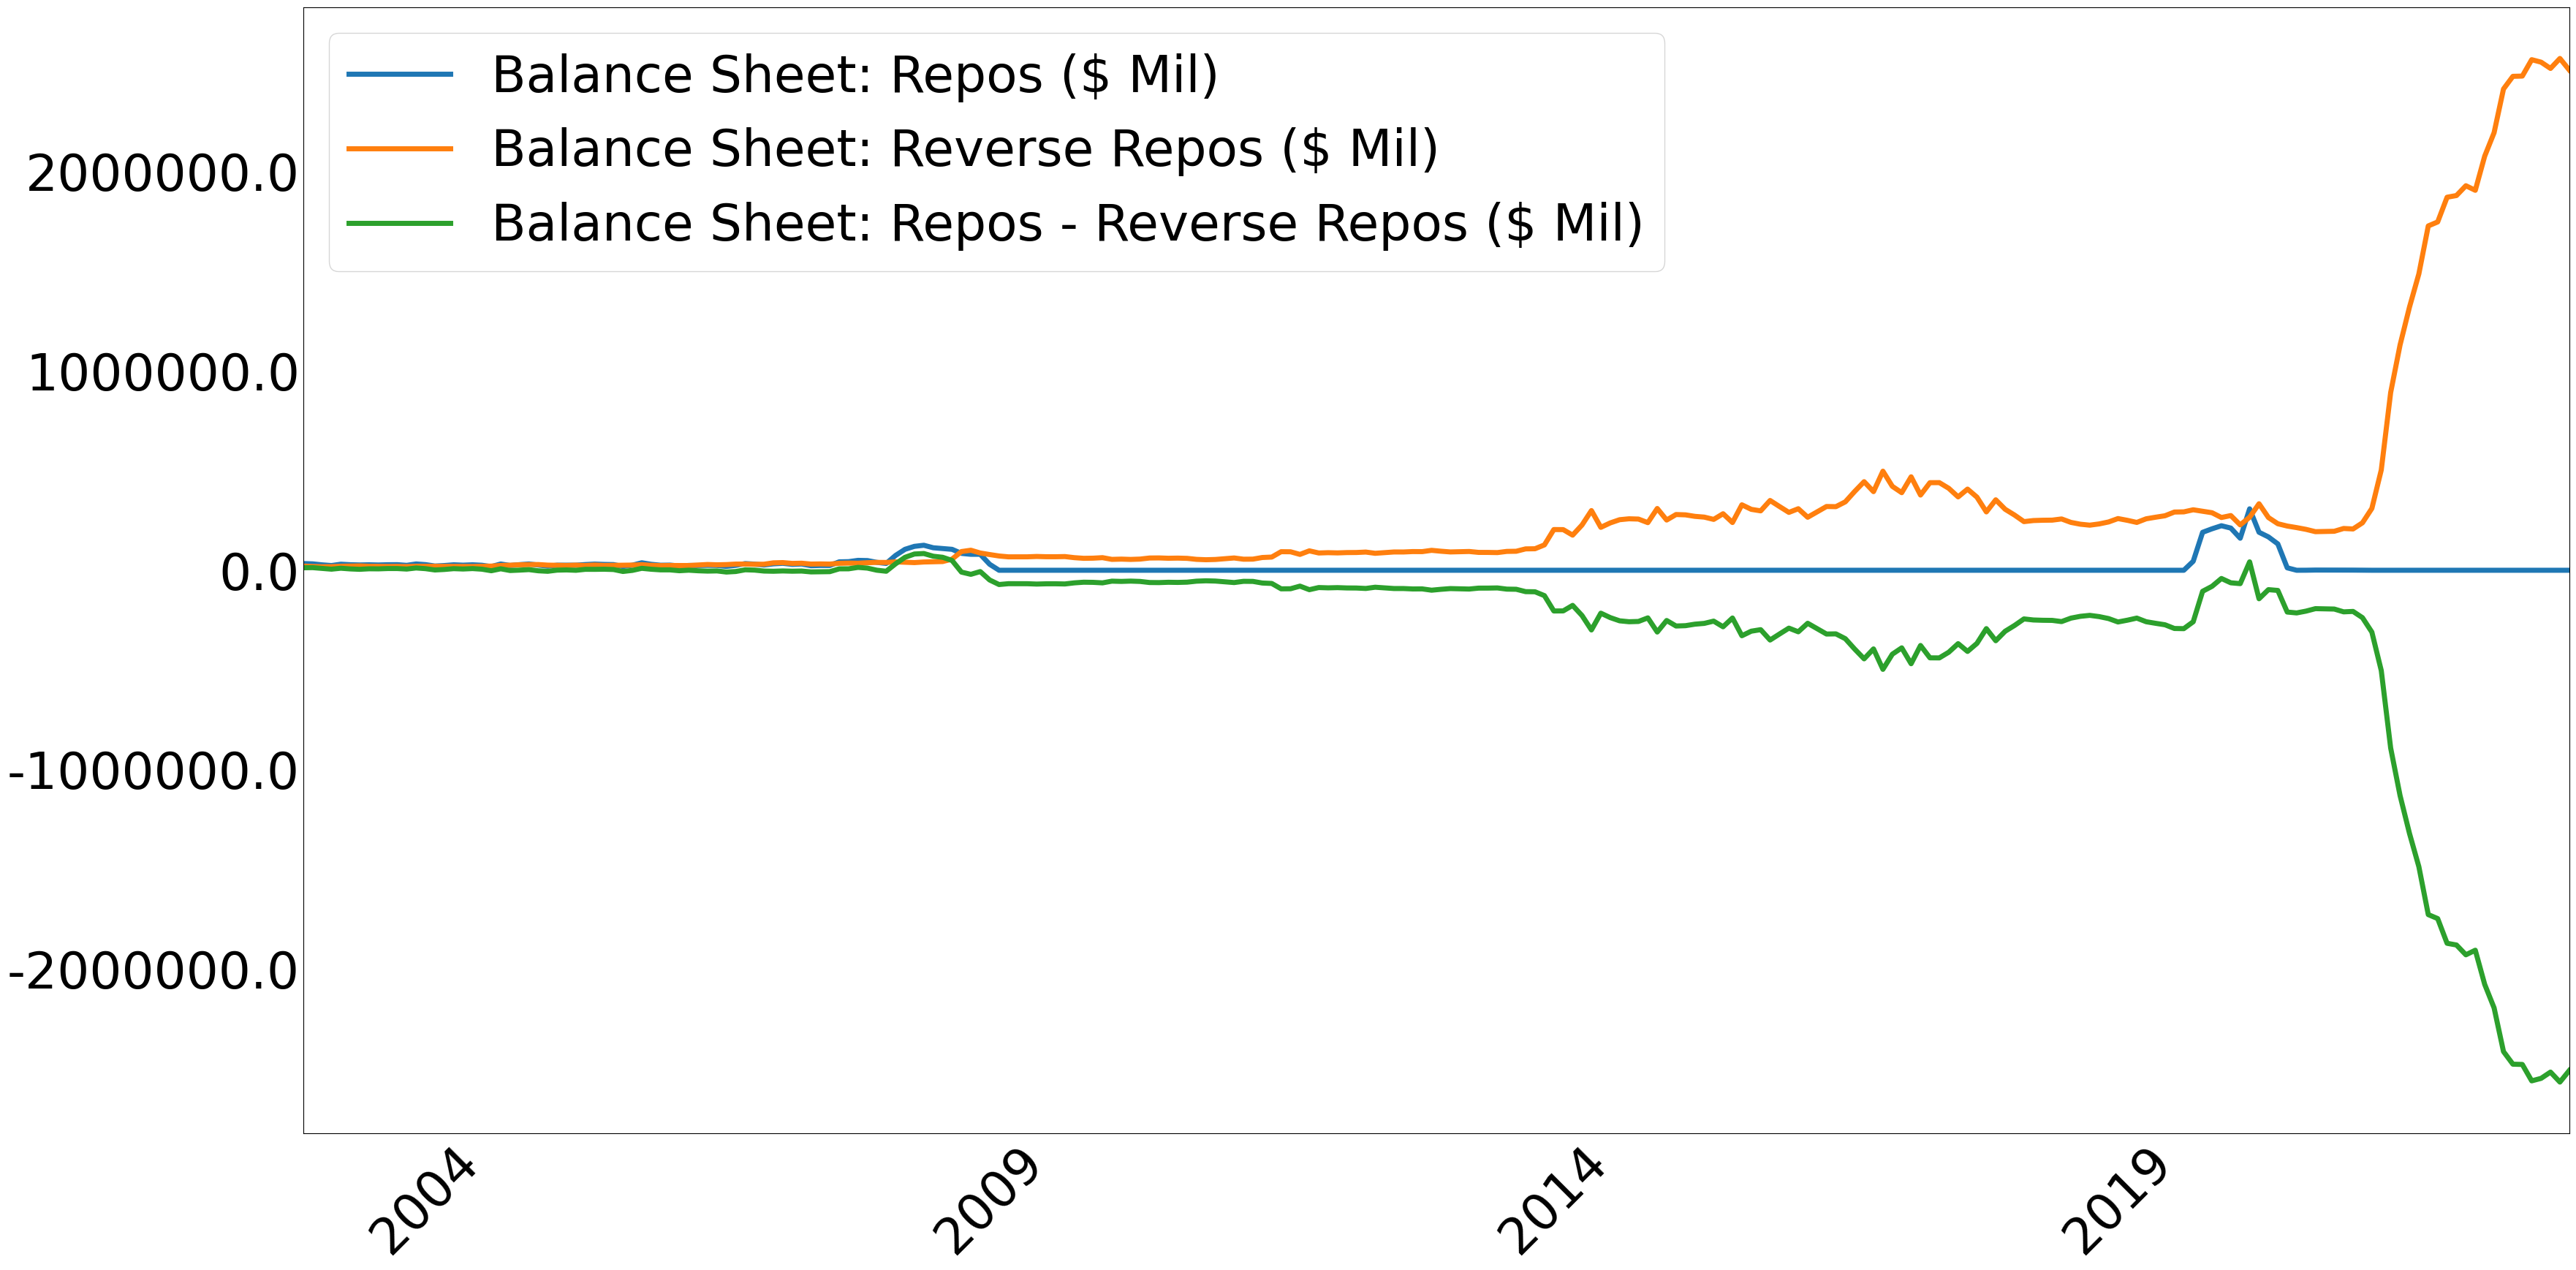

In [33]:
data["Balance Sheet: Repos - Reverse Repos ($ Mil)"] =\
    data["Balance Sheet: Repos ($ Mil)"].sub(data["Balance Sheet: Reverse Repos ($ Mil)"])
overnight_vars = ["Balance Sheet: Repos ($ Mil)",
                  "Balance Sheet: Reverse Repos ($ Mil)",
                 "Balance Sheet: Repos - Reverse Repos ($ Mil)"]
plot_data = data[overnight_vars].dropna()
fig, ax = plot_lines(plot_data)

## Federal Funds Rate

C:\Users\jacob\AppData\Local\Temp\ipykernel_23156\967659058.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(y,2) for y in y_vals])


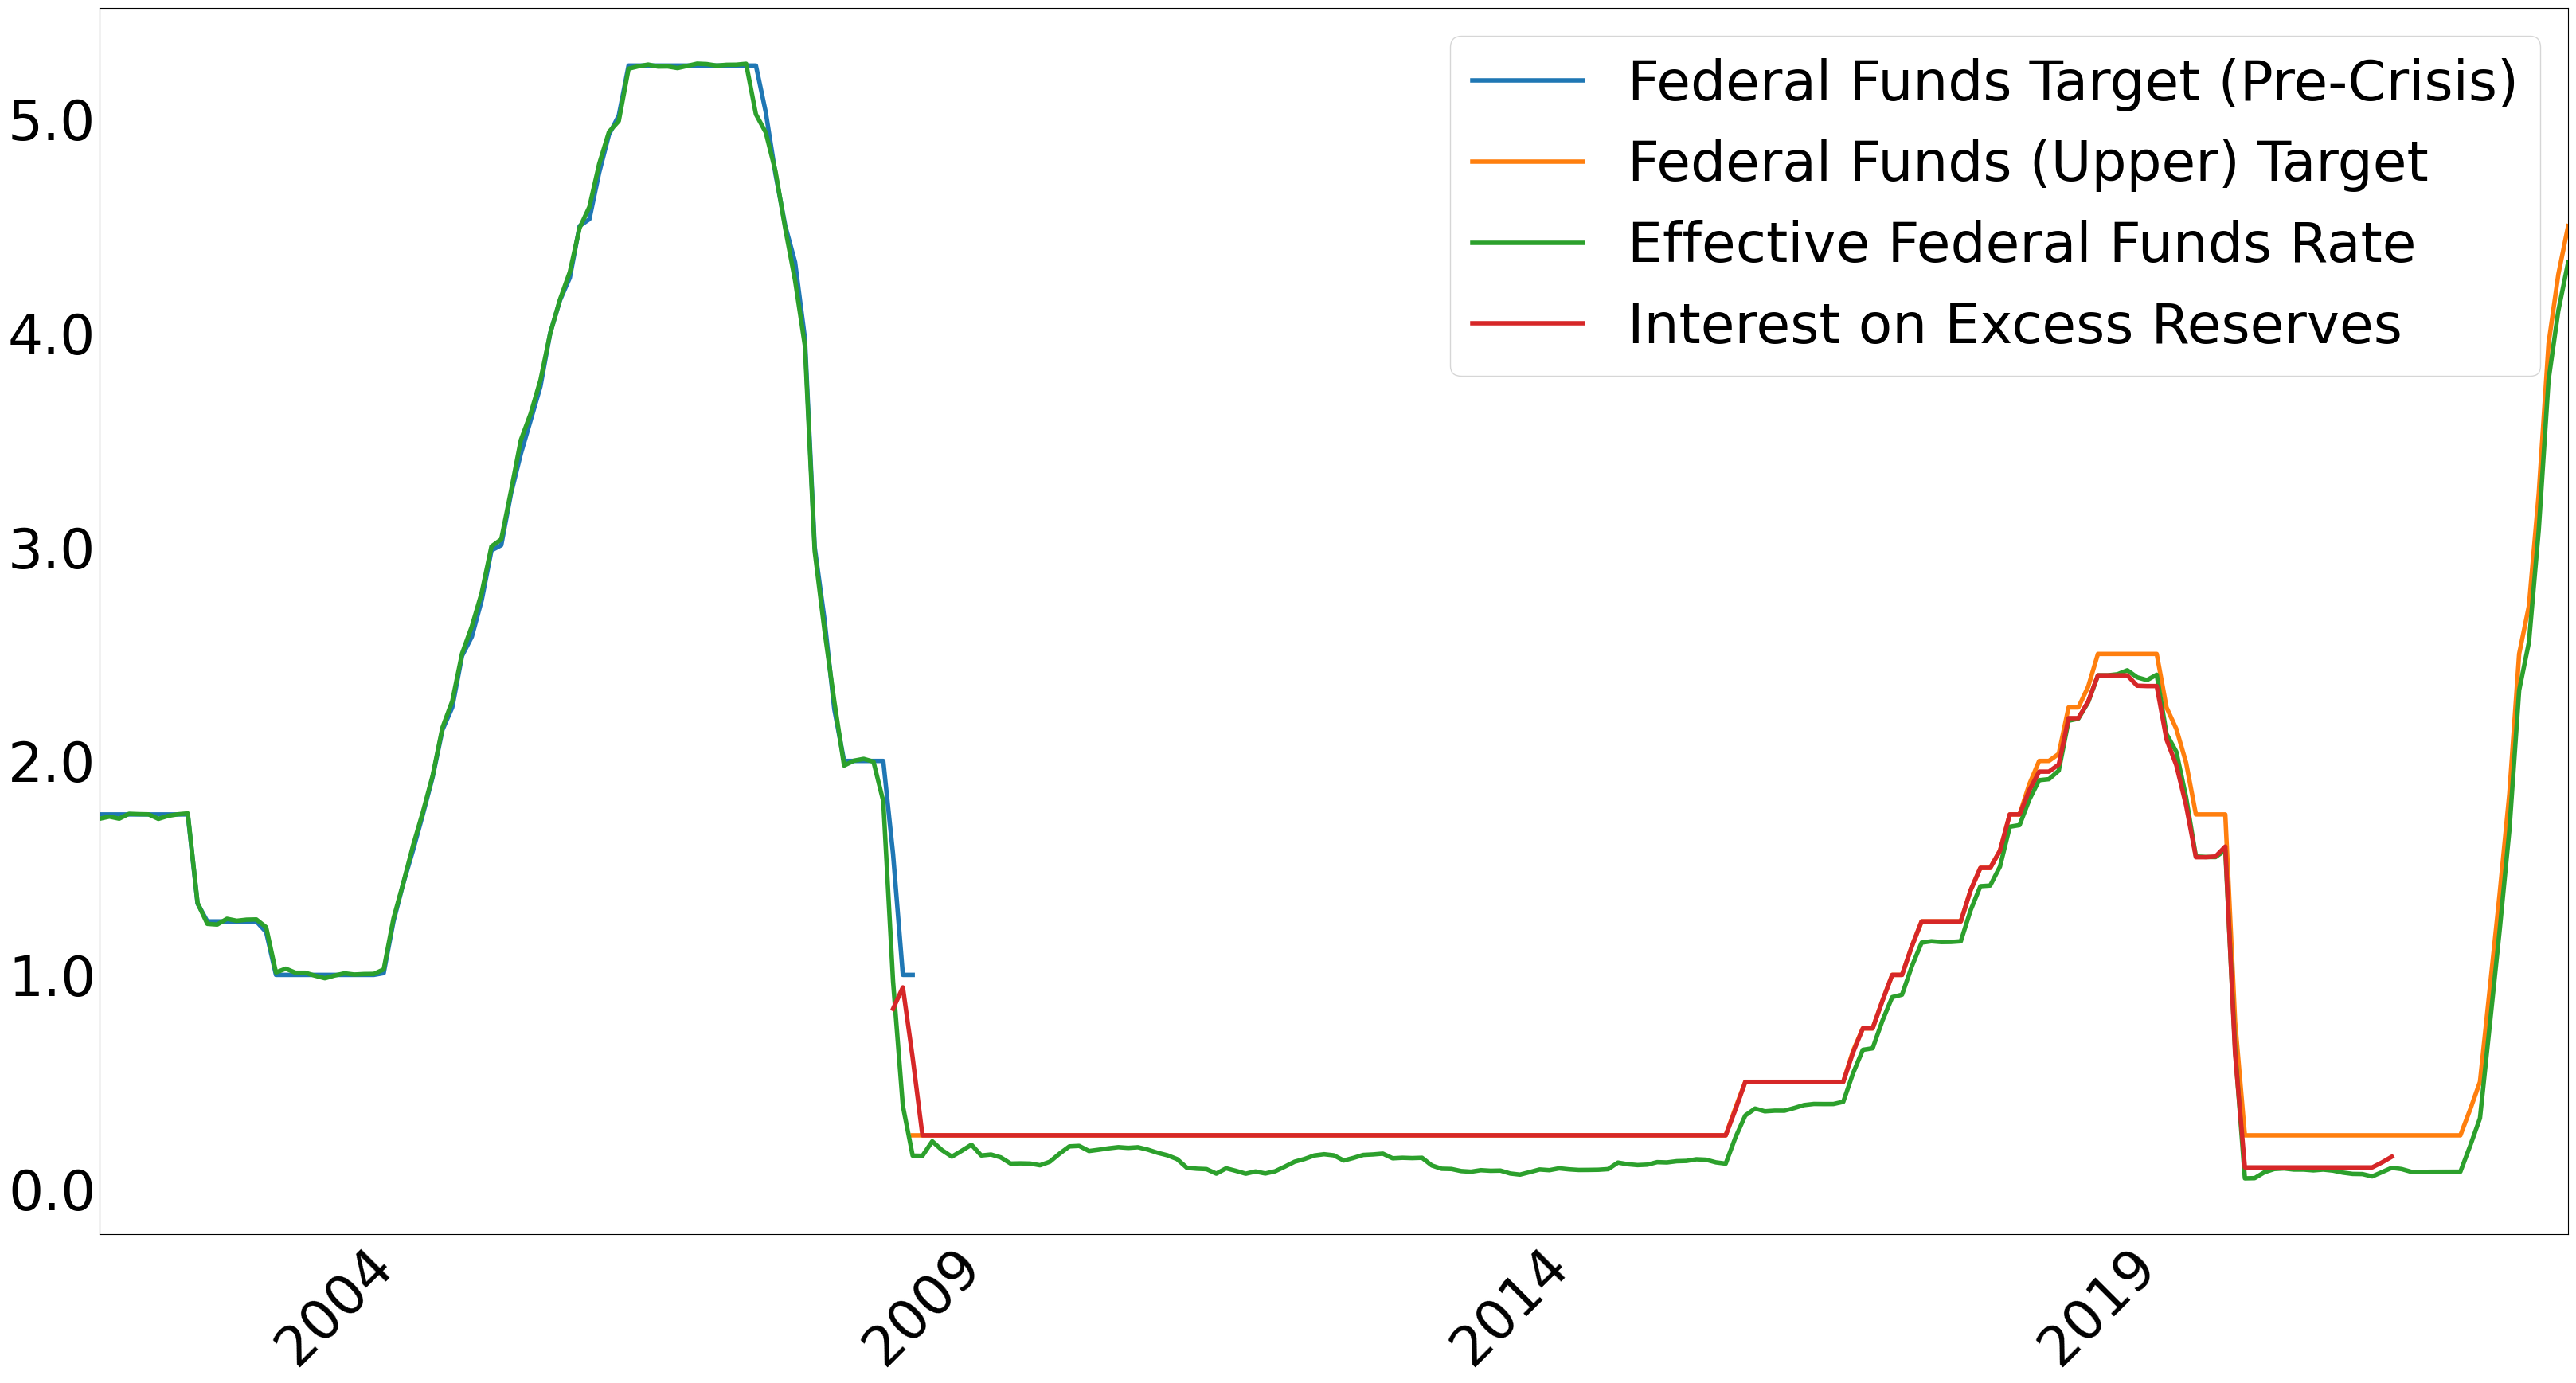

In [37]:
interest_vars = ["Federal Funds Target (Pre-Crisis)",
                  "Federal Funds (Upper) Target",
                  "Effective Federal Funds Rate",
                  "Interest on Excess Reserves"]
plot_data = data[interest_vars]
fig, ax = plot_lines(data[interest_vars], linewidth = 4)